## Telecom Churn Group Case Study

### Problem Statement

#### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn

<a id='Import'></a>
### Import  Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from sklearn import linear_model
from sklearn import metrics

<a id='bbb'></a>
### Importing the Data

In [2]:
# Read the data
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


<a id='ccc'></a>
### Inspecting the Dataframe

In [3]:
df.shape

(99999, 226)

In [4]:
# Checking the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
# Checking for duplicate records in the data set
sum(df.duplicated(subset = 'mobile_number')) == 0

True

* No Duplicate data exist in the dataset

In [7]:
# identifying how many total numerical columns are there
df.select_dtypes(include=['int64','float64']).columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=214)

In [8]:
# identifying how many total categorical columns are there
df.select_dtypes(include=['object']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

### Data Preparation and Exploratory Data Aanalysis

#### Deriving High Value Customer

In [9]:
# Creating new column called average recharge amount for good phase based on the June(6) and July(7) total recharge amount
df['avg_rech_amt_good_phase'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,307.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,229.0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,241.5
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,270.0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,273.0


In [10]:
# describe
df['avg_rech_amt_good_phase'].describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: avg_rech_amt_good_phase, dtype: float64

In [11]:
# Retrieve the High value customer based on the 70th percentile of the average amount
df_new = df.avg_rech_amt_good_phase.quantile(0.7)
df_new

368.5

In [12]:
# Filter the High Value customer
df = df[df.avg_rech_amt_good_phase > df_new]
df.shape

(29979, 227)

In [13]:
# describe on avg_rech_amt_good_phase column
df['avg_rech_amt_good_phase'].describe()

count    29979.000000
mean       697.014644
std        488.925223
min        369.000000
25%        450.000000
50%        569.000000
75%        796.000000
max      37762.500000
Name: avg_rech_amt_good_phase, dtype: float64

In [14]:
# Let's check the head
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0


#### Tag Churners and Remove Attributes of The Churn Phase

In [15]:
# Let's print the columns related to the usage of Sep(9) month
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0


Now tag the churned customers (churn=1 or else 0) based on the fourth month as follows: 
Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase

In [16]:
# Creating the Churn column based on non usage of any services on 9th month
df['Churn'] = np.where(df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1, 0)

In [17]:
# Inspecting the Churn column
df['Churn'].head(12)

7     1
8     0
13    0
16    0
17    0
21    0
24    0
33    0
38    0
41    0
48    0
53    0
Name: Churn, dtype: int32

#### Checking the Churn Rate

In [18]:
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

8.636045231662164

Text(0.5, 1.0, 'Churn Distribution Plot')

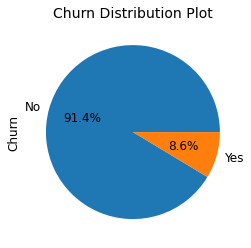

In [19]:
# Checking the churn distribution
axis = (df['Churn'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%',labels = ['No', 'Yes'],figsize =(4,4), fontsize = 12 )                                                                           
axis.set_ylabel('Churn',fontsize = 12)
axis.set_title('Churn Distribution Plot', fontsize = 14)

#### From the above pie diagram it is observed that only 8.63% customers are churn out and the rest of the customer did not churn. The data is highly imbalanced and we need to take care of it during model building

#### Once tagging is done dropping all the columns related to churn phase
Identifying all the columns with '_9' as suffix and drop them

In [20]:
# Storing the list of columns related to churn phase
churn_phase_drop_col_list = [cols for cols in df.columns if '_9' in cols]
# Print the list of churn columns and validate before dropping
print(churn_phase_drop_col_list)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [21]:
# Drop the above columns
df.drop(churn_phase_drop_col_list, axis=1, inplace=True)
df.shape

(29979, 174)

#### Handling Null Values and Imputation

In [22]:
# Check for null values and percentages
round(100*(df.isnull().sum().sort_values(ascending=False))/len(df), 2)

total_rech_data_6     62.02
fb_user_6             62.02
av_rech_amt_data_6    62.02
count_rech_2g_6       62.02
max_rech_data_6       62.02
                      ...  
last_day_rch_amt_6     0.00
last_day_rch_amt_7     0.00
last_day_rch_amt_8     0.00
vol_2g_mb_6            0.00
mobile_number          0.00
Length: 174, dtype: float64

* There are many columns having >=60% of null values, we will drop them.

In [23]:
# Prepare the list of the columns having more than >=60% null values
cols_null_values = ['total_rech_data_6','fb_user_6','av_rech_amt_data_6','count_rech_2g_6','max_rech_data_6',
                            'arpu_3g_6','arpu_2g_6','night_pck_user_6','date_of_last_rech_data_6','count_rech_3g_6',
                            'arpu_2g_7','date_of_last_rech_data_7','count_rech_3g_7','count_rech_2g_7','max_rech_data_7',
                            'total_rech_data_7','arpu_3g_7','night_pck_user_7','av_rech_amt_data_7','fb_user_7',
                            'max_rech_data_8','count_rech_2g_8','night_pck_user_8','fb_user_8','arpu_2g_8',
                            'count_rech_3g_8','arpu_3g_8','av_rech_amt_data_8','date_of_last_rech_data_8','total_rech_data_8']

In [24]:
df.drop(cols_null_values, axis=1, inplace=True)
df.shape

(29979, 144)

#### Now let's check the data for any columns having single / unique values

In [25]:
# List of columns with single / unique value
single_value_col_df = df.loc[:, df.apply(pd.Series.nunique) == 1]
single_value_col_df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
13,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
16,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
17,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0


#### We can drop these columns as there is no variance in the data

In [26]:
# Drop the columns with single/unique value
df.drop(single_value_col_df.columns, axis=1, inplace=True)
df.shape

(29979, 131)

In [27]:
cols=df.columns
cols

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_amt_good_phase',
       'Churn'],
      dtype='object', length=131)

#### Missing Value Imputation

In [28]:
# Check again for remaining null values and percentages
round(100*(df.isnull().sum().sort_values(ascending=False))/len(df), 2)

isd_ic_mou_8          3.13
std_og_mou_8          3.13
loc_og_t2m_mou_8      3.13
loc_og_t2f_mou_8      3.13
loc_ic_t2t_mou_8      3.13
                      ... 
last_day_rch_amt_6    0.00
last_day_rch_amt_7    0.00
last_day_rch_amt_8    0.00
vol_2g_mb_6           0.00
mobile_number         0.00
Length: 131, dtype: float64

In [29]:
# Let's check for any non numeric columns
df.select_dtypes(include=['object']).columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

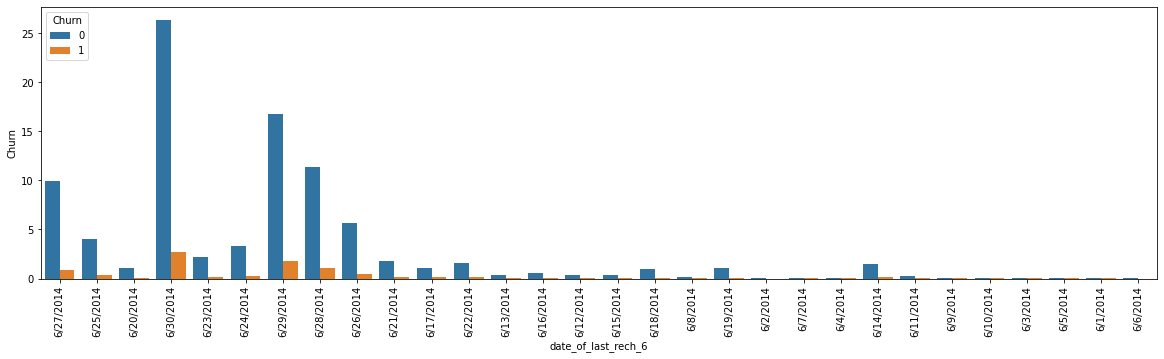

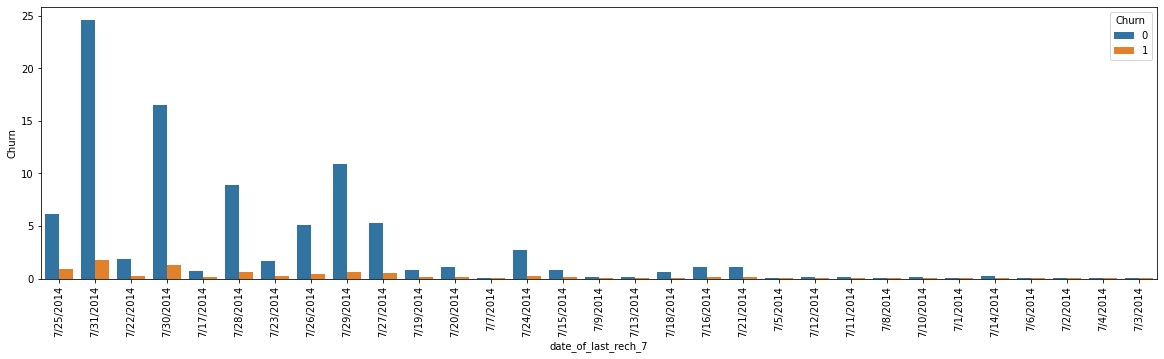

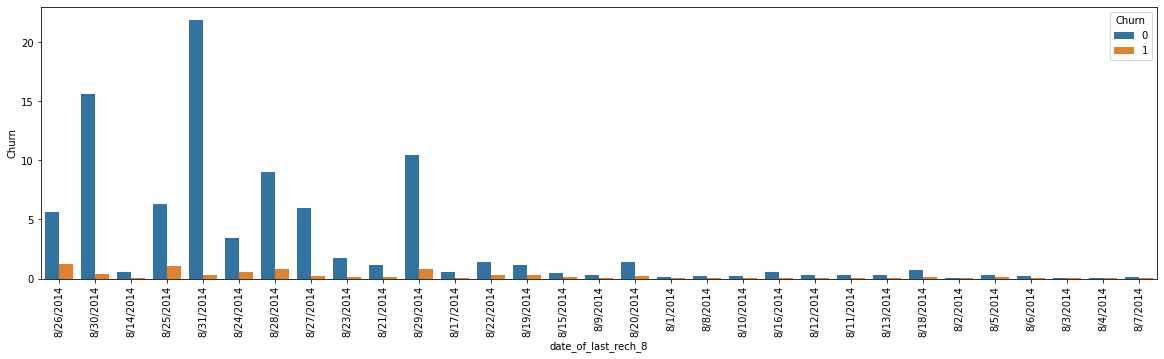

In [30]:
# Comparative data Analysis by Dates

plt.figure(figsize=(20,5))
sns.barplot(x="date_of_last_rech_6", y="Churn", hue="Churn", data=df,estimator=lambda x: len(x) / len(df) * 100)
xticks(rotation = 90)

plt.figure(figsize=(20,5))
sns.barplot(x="date_of_last_rech_7", y="Churn", hue="Churn", data=df, estimator=lambda x: len(x) / len(df) * 100)
xticks(rotation = 90)

plt.figure(figsize=(20,5))
sns.barplot(x="date_of_last_rech_8", y="Churn", hue="Churn", data=df, estimator=lambda x: len(x) / len(df) * 100)
xticks(rotation = 90)
plt.show()

* From the above plots for 6th, 7th & 8th month, it is concluded that chances of Customer churn increases towardsmonth end

In [31]:
# there are 3 date columns which has missing values and need imputation

df['date_of_last_rech_6'].fillna(df['date_of_last_rech_6'].mode()[0], inplace=True)
df['date_of_last_rech_7'].fillna(df['date_of_last_rech_7'].mode()[0], inplace=True)
df['date_of_last_rech_8'].fillna(df['date_of_last_rech_8'].mode()[0], inplace=True)

In [32]:
# Once the imputation with date column done, let's extract the day value from the date and store it against the date 
# fields for future processing
df['date_of_last_rech_6'] = pd.to_datetime(df.date_of_last_rech_6).dt.day
df['date_of_last_rech_7'] = pd.to_datetime(df.date_of_last_rech_7).dt.day
df['date_of_last_rech_8'] = pd.to_datetime(df.date_of_last_rech_8).dt.day

In [33]:
# Prepare the list of columns having missing values for Imputation
col_having_missing_values = df.columns[df.isnull().sum()>0]
col_having_missing_values

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

* As all the columns are numeric, observing the columns data, we decided to impute the missing values with median value

In [34]:
# Imputing with mean for all the columns in col_having_missing_values list
for cols in col_having_missing_values:
    df[cols].fillna((df[cols].median()), inplace=True)

In [35]:
# Check again for any missing values after inputation
round(100*(df.isnull().sum().sort_values(ascending=False))/len(df), 2)

Churn               0.0
std_og_t2t_mou_7    0.0
std_og_t2m_mou_6    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_8    0.0
                   ... 
total_rech_num_7    0.0
total_rech_num_8    0.0
total_rech_amt_6    0.0
total_rech_amt_7    0.0
mobile_number       0.0
Length: 131, dtype: float64

In [36]:
x_cols=df.columns
x_cols

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_amt_good_phase',
       'Churn'],
      dtype='object', length=131)

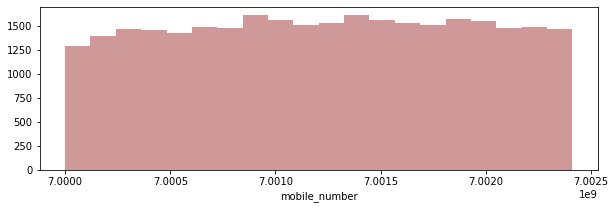

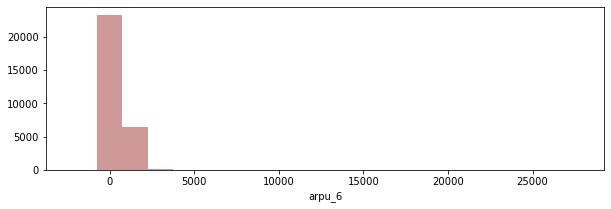

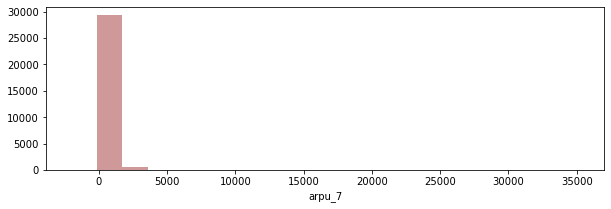

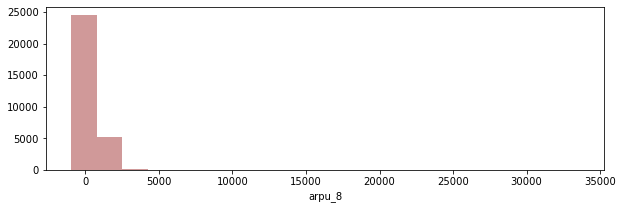

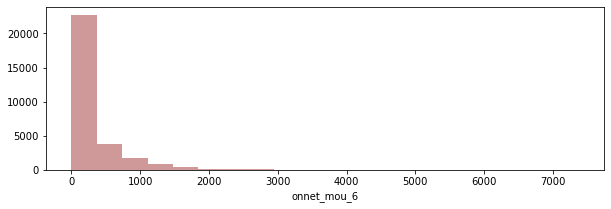

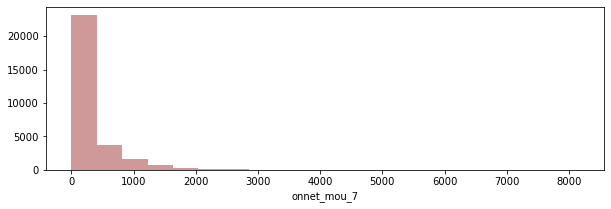

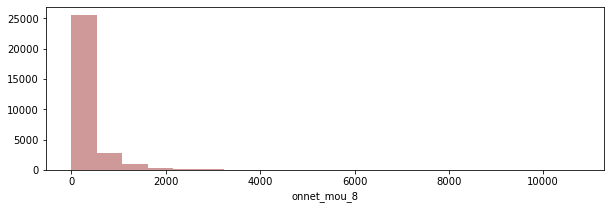

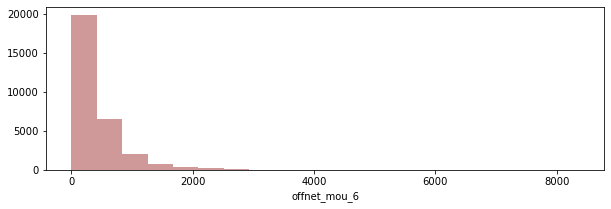

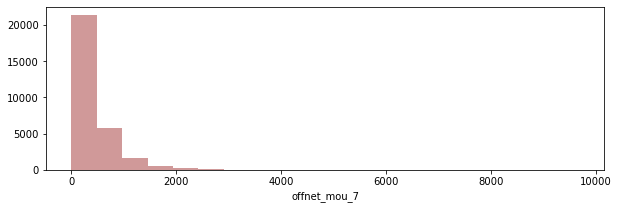

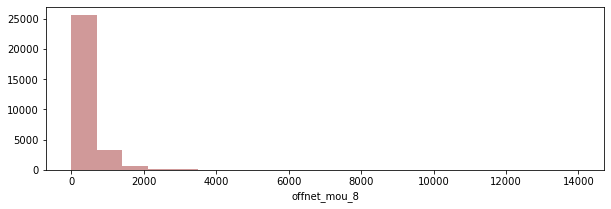

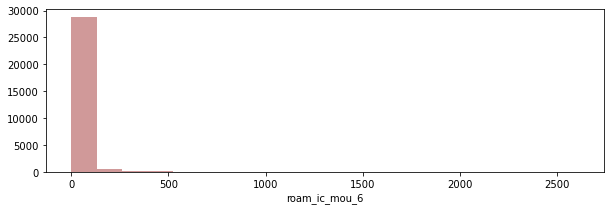

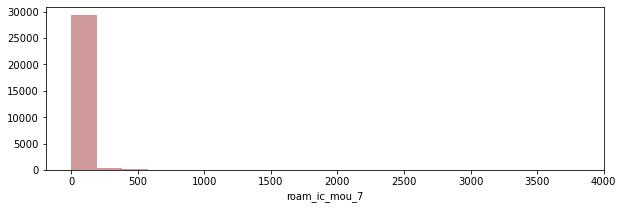

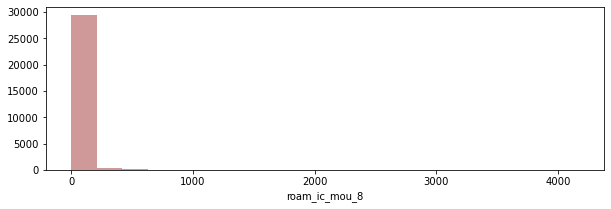

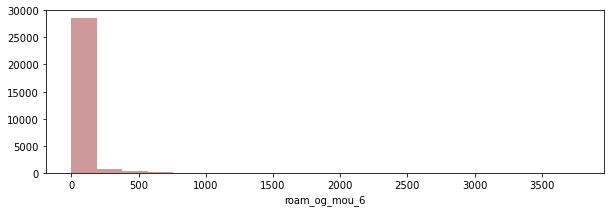

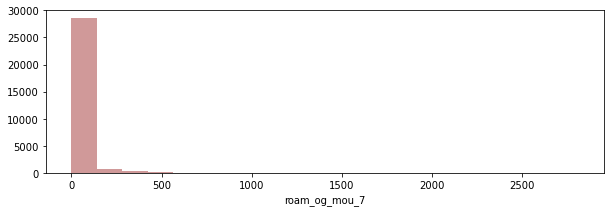

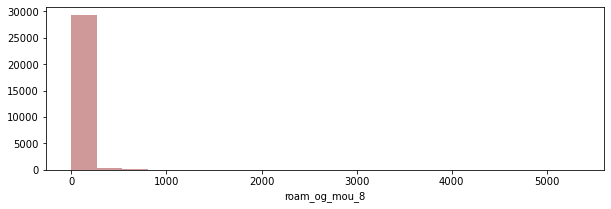

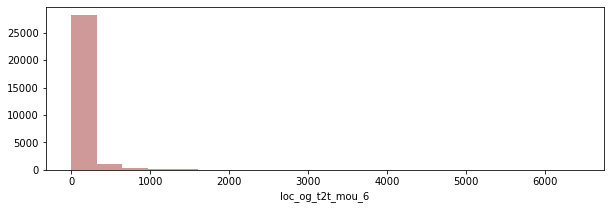

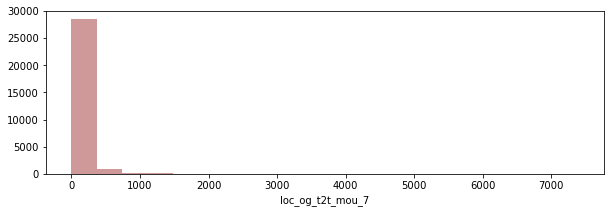

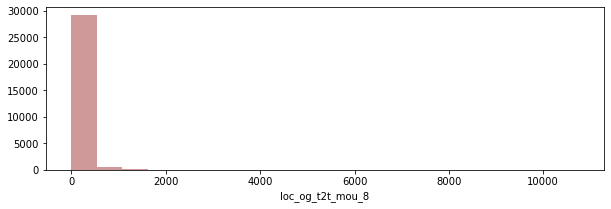

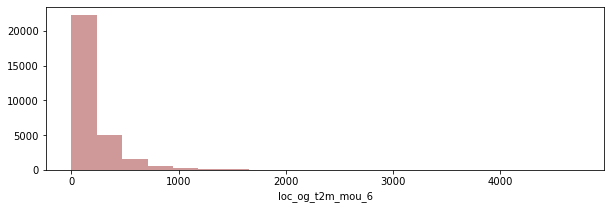

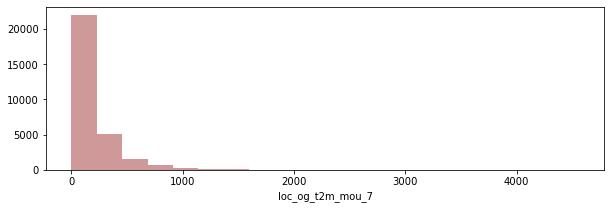

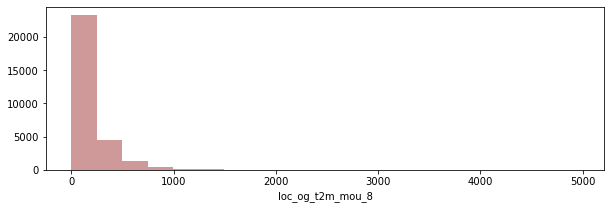

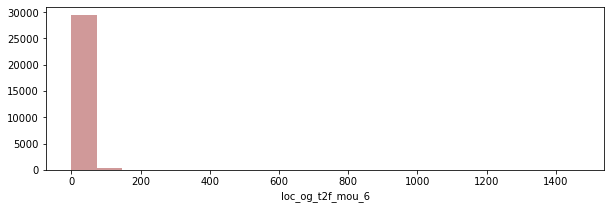

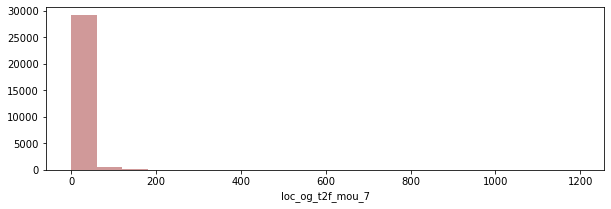

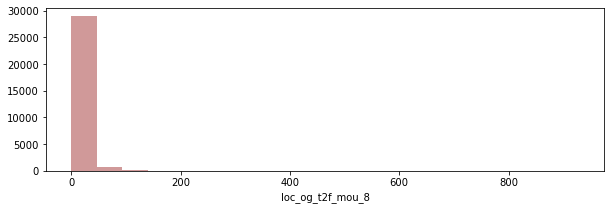

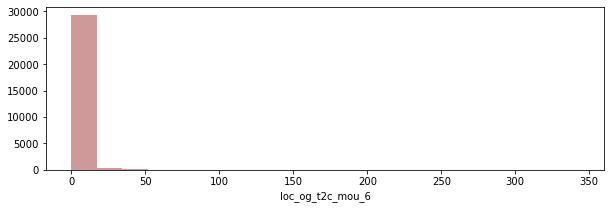

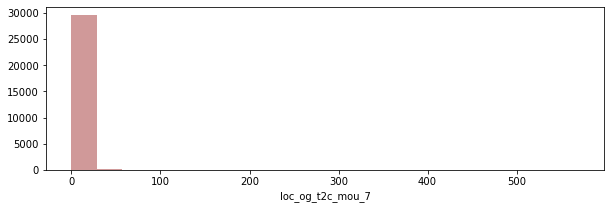

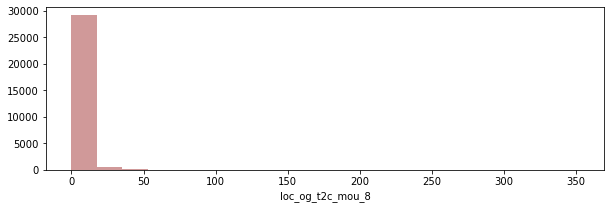

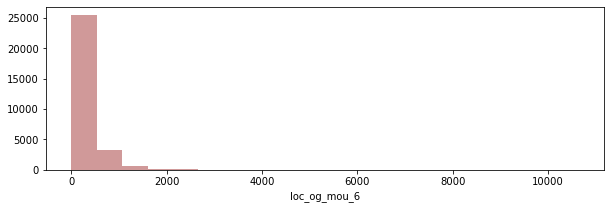

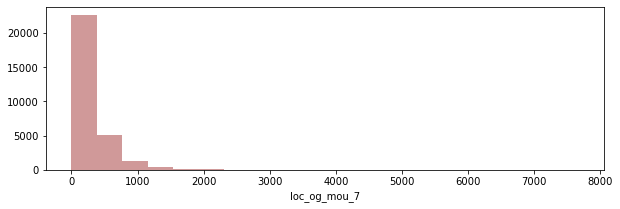

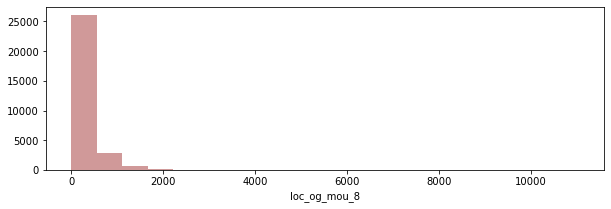

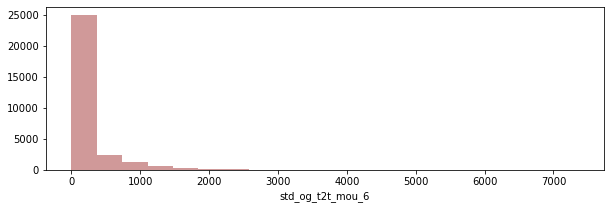

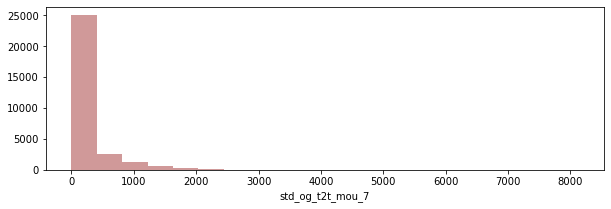

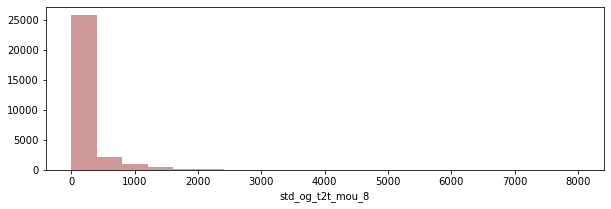

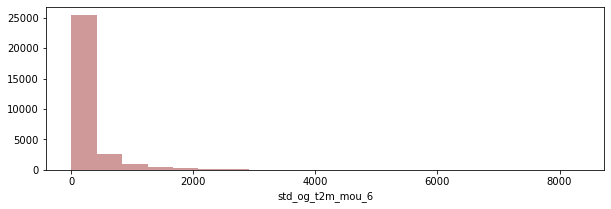

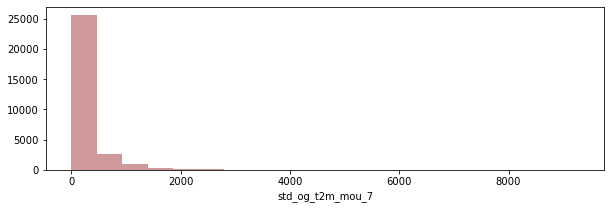

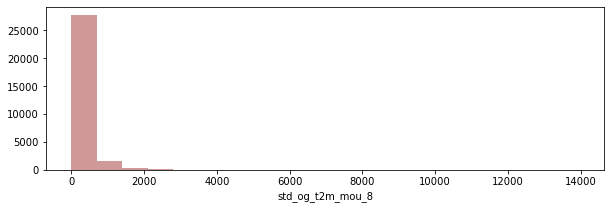

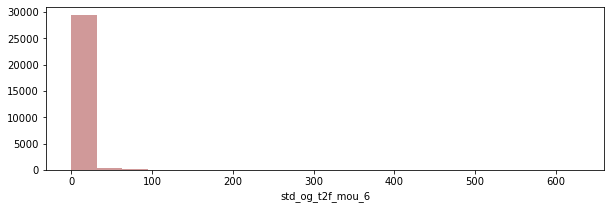

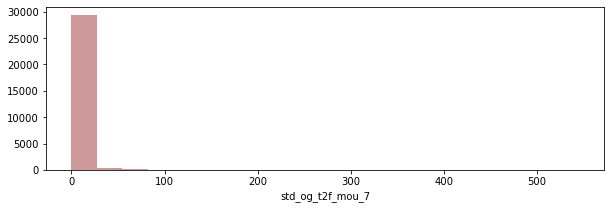

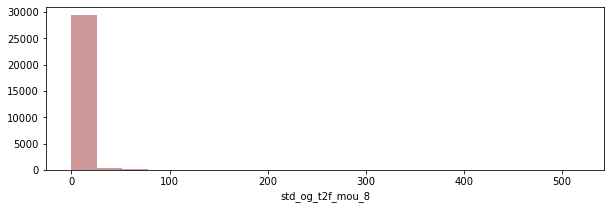

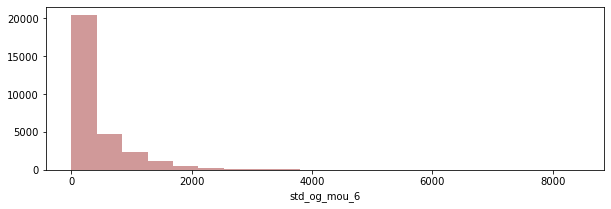

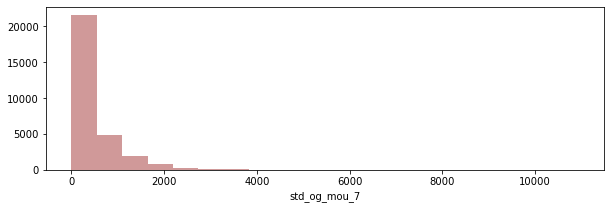

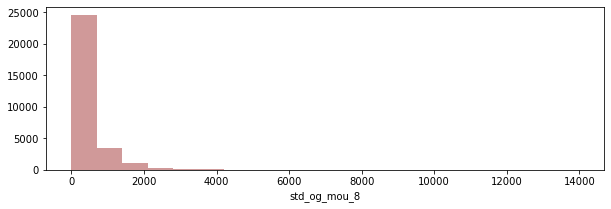

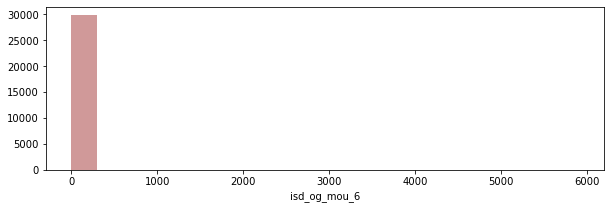

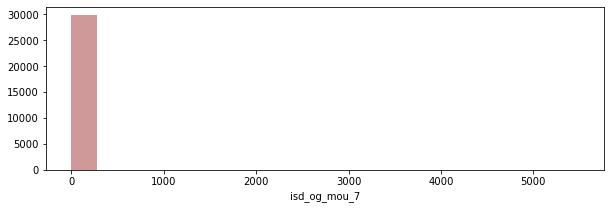

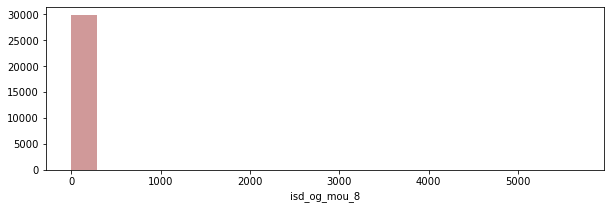

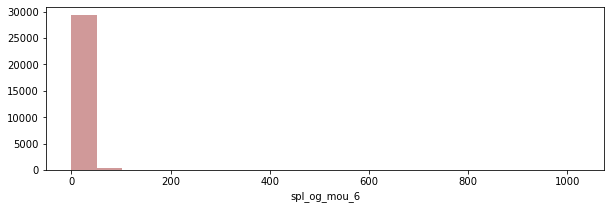

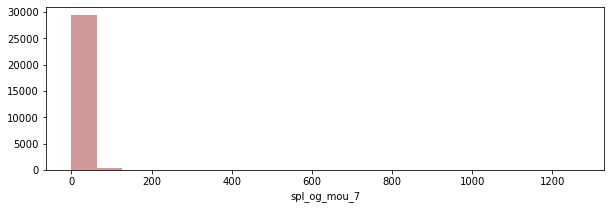

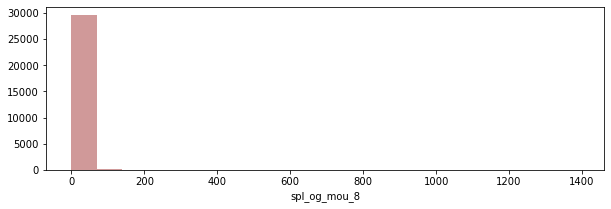

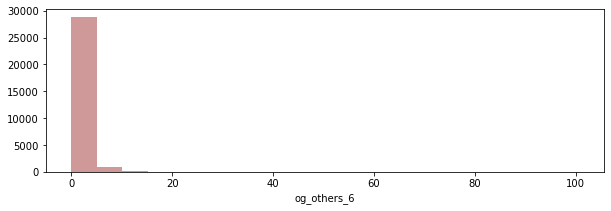

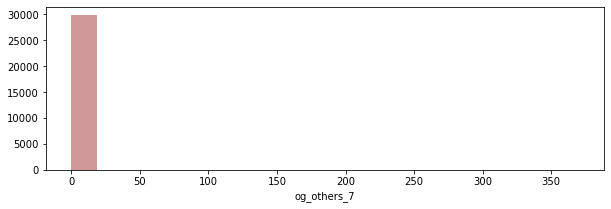

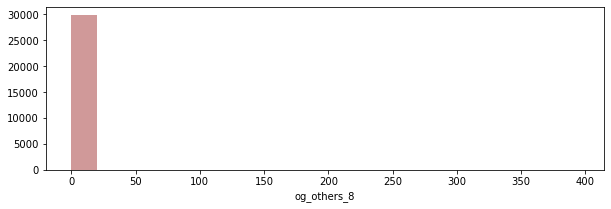

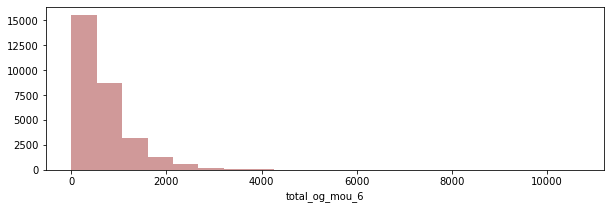

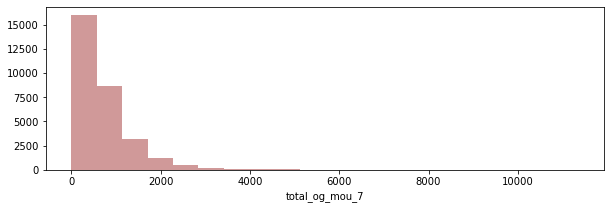

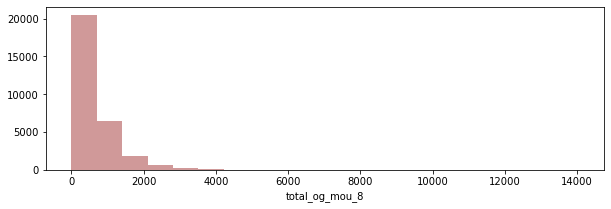

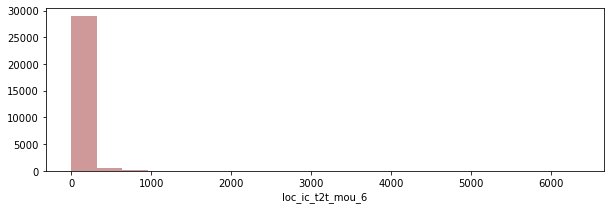

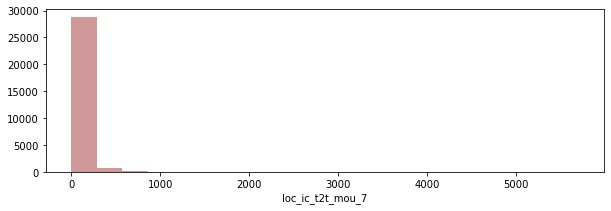

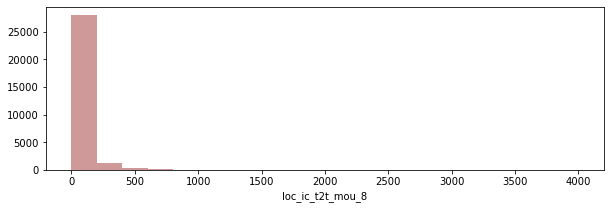

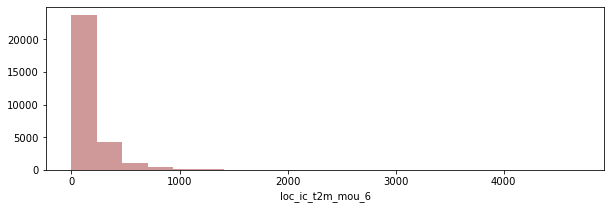

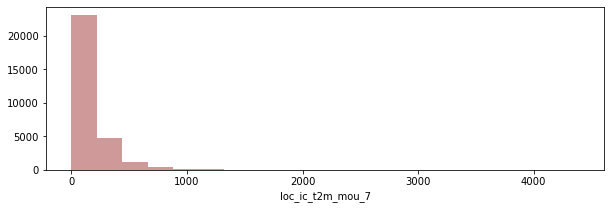

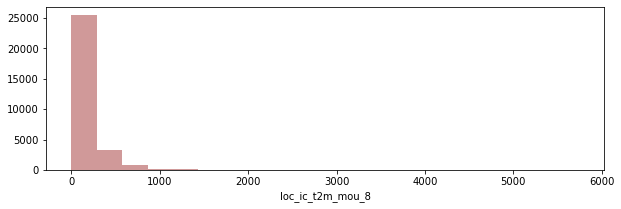

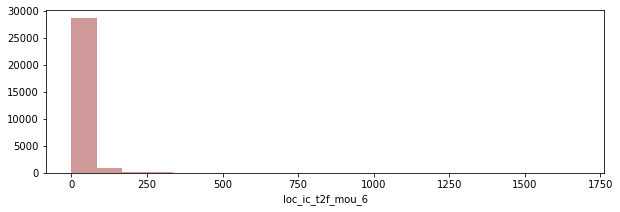

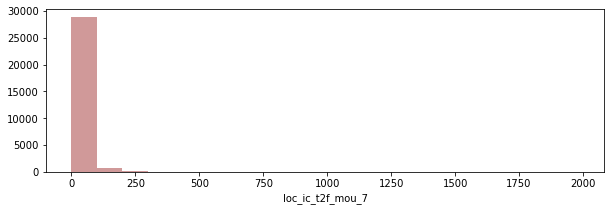

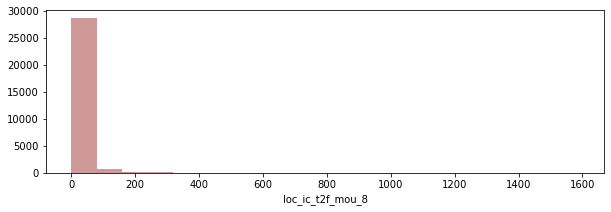

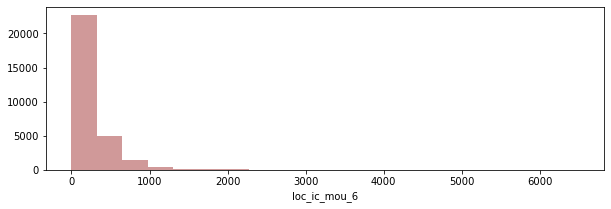

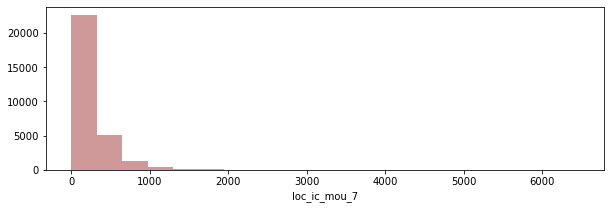

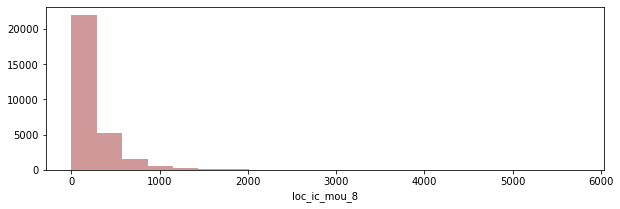

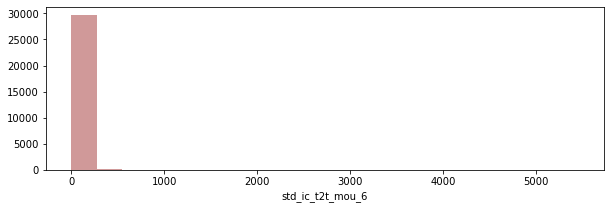

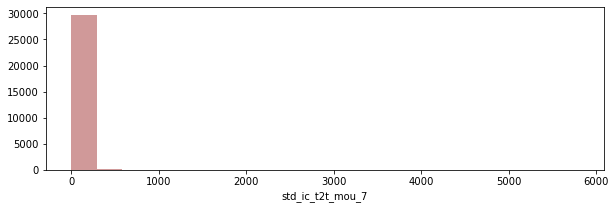

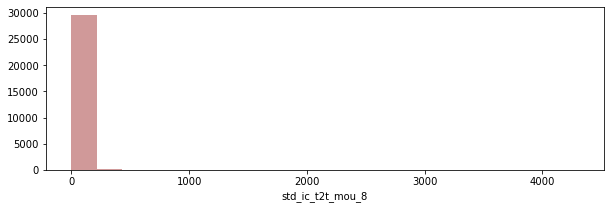

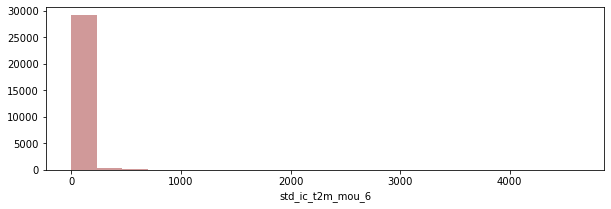

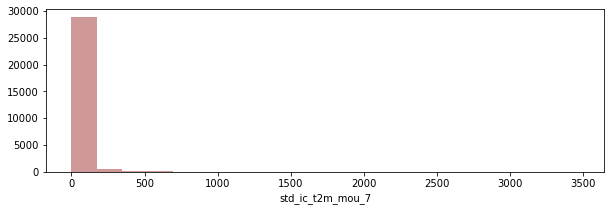

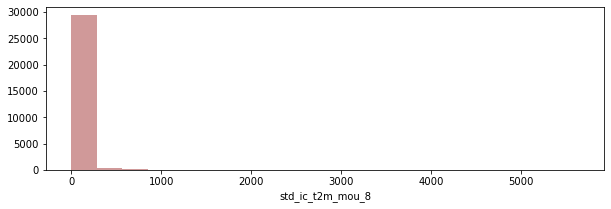

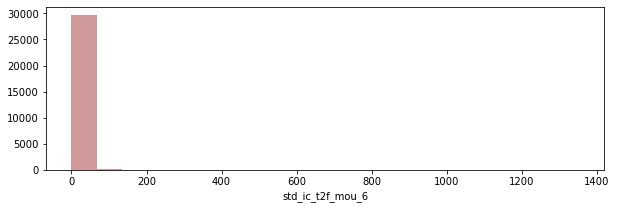

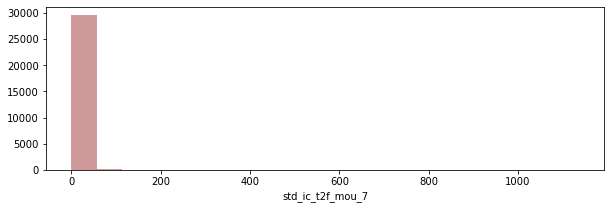

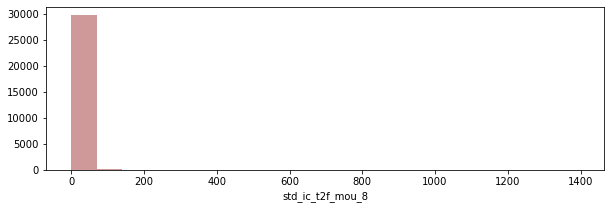

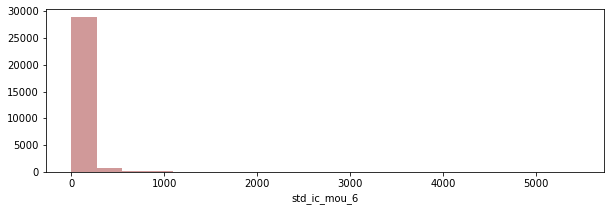

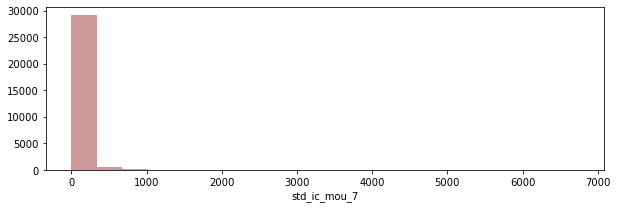

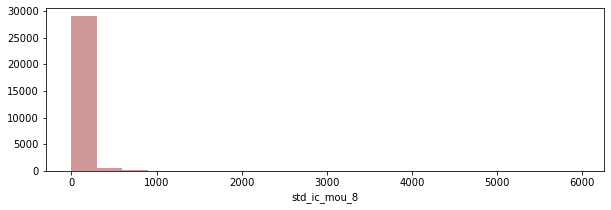

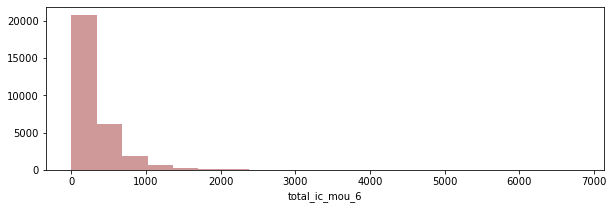

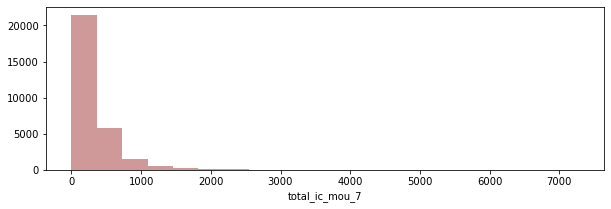

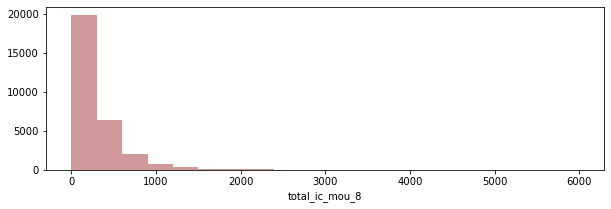

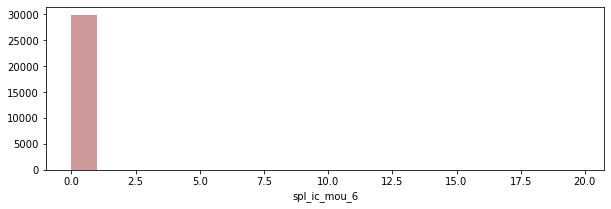

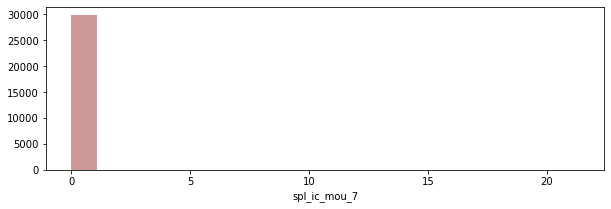

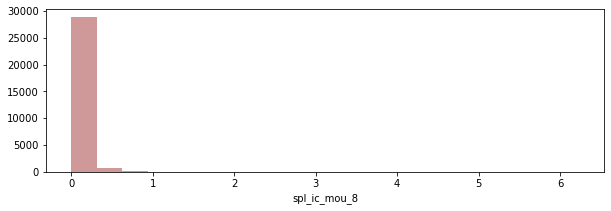

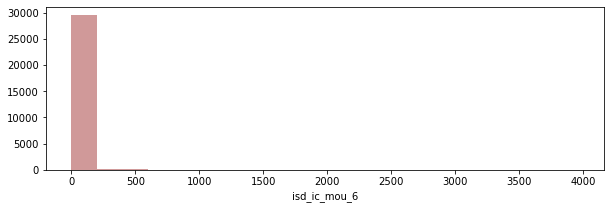

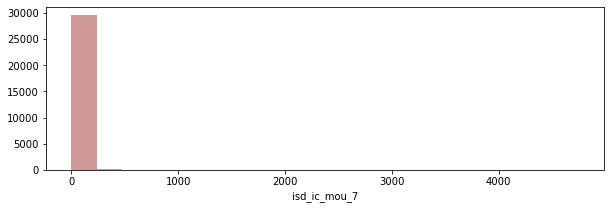

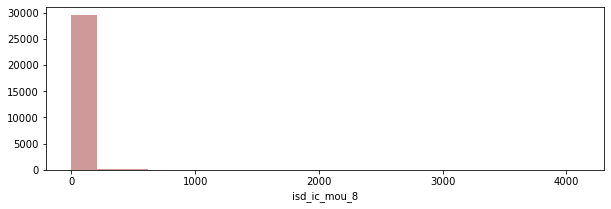

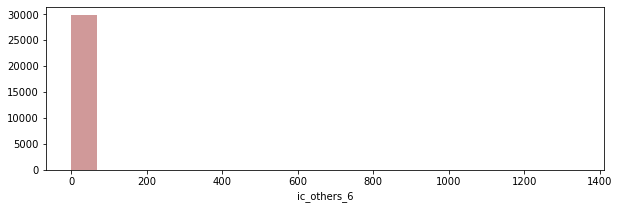

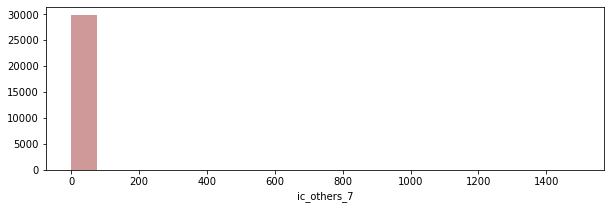

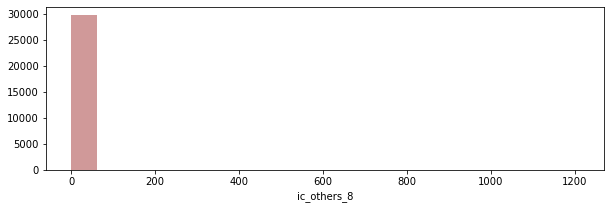

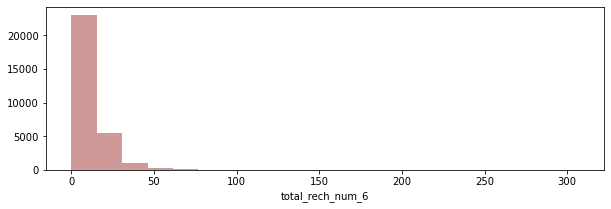

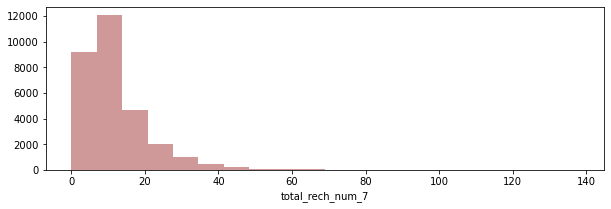

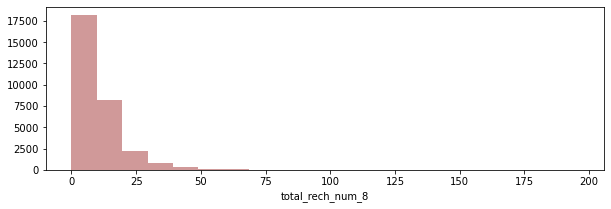

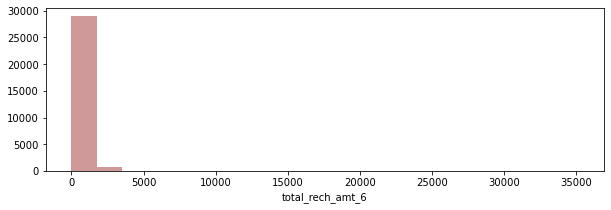

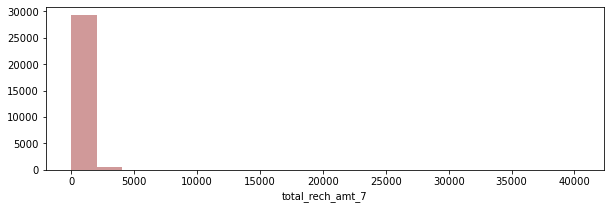

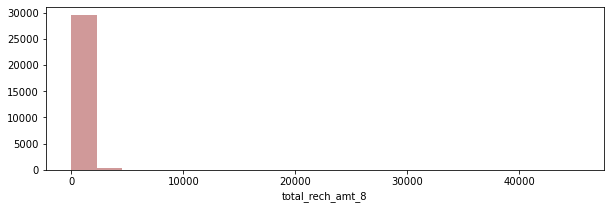

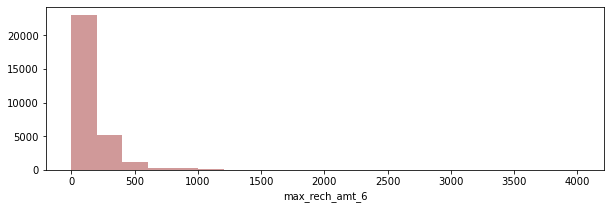

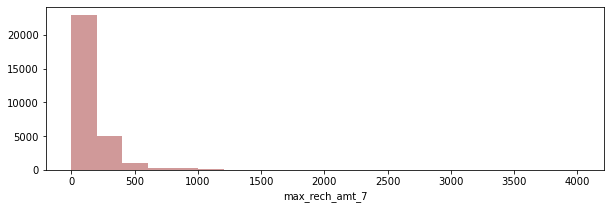

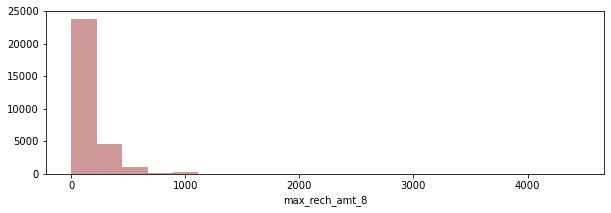

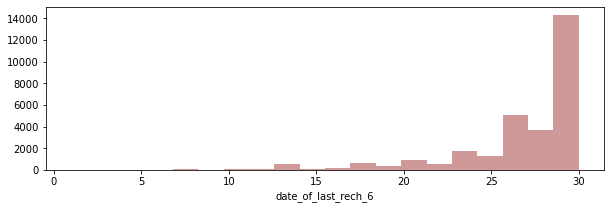

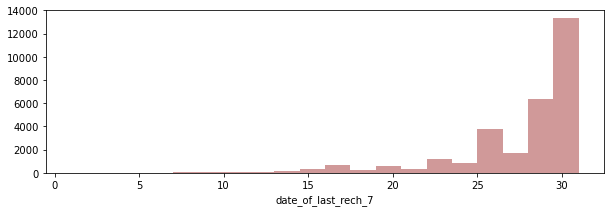

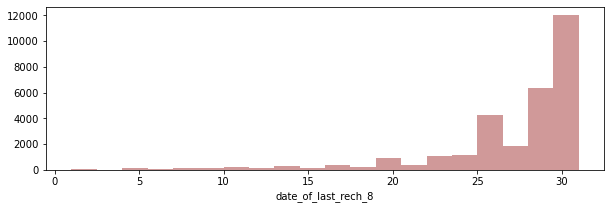

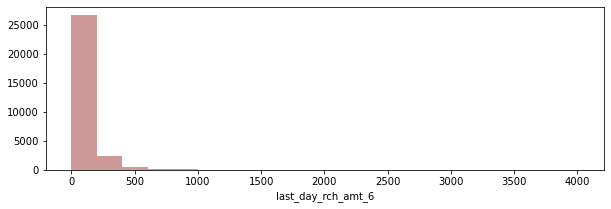

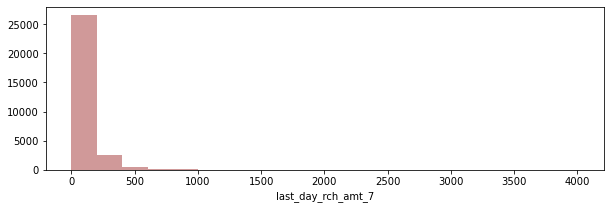

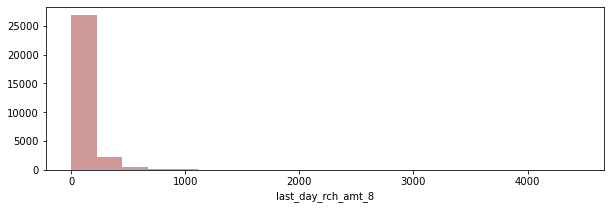

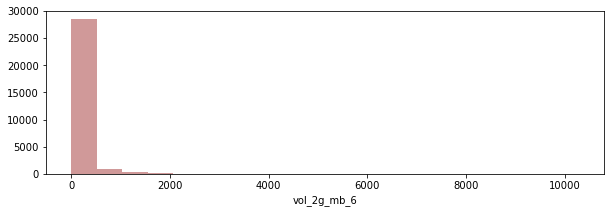

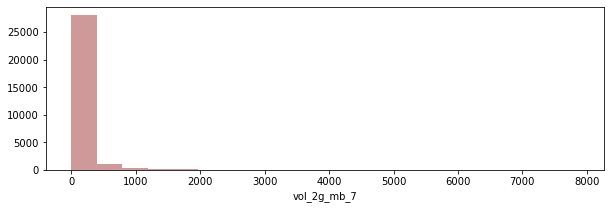

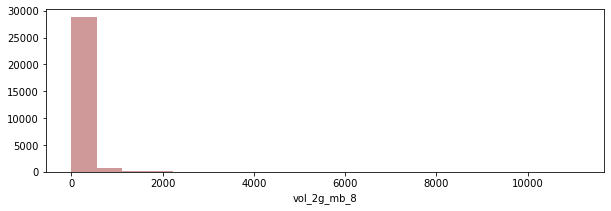

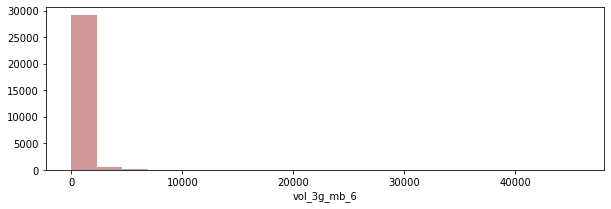

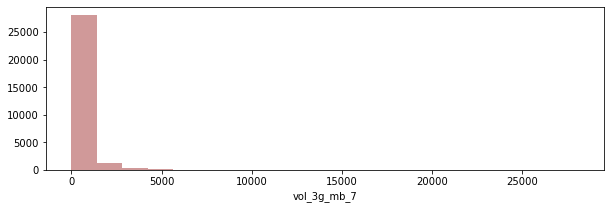

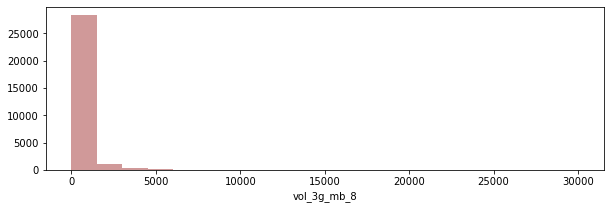

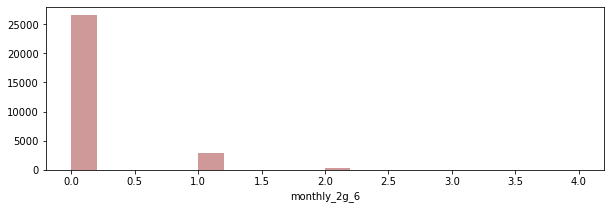

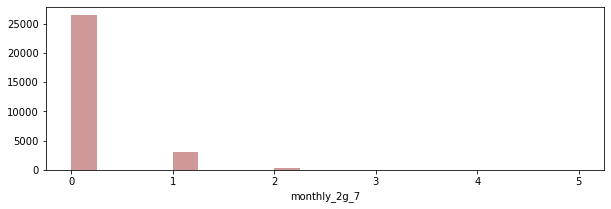

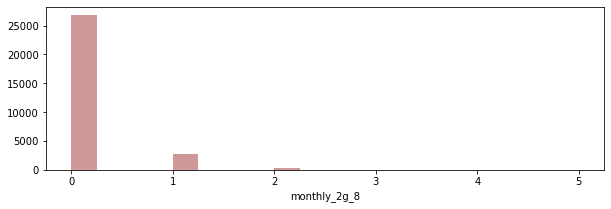

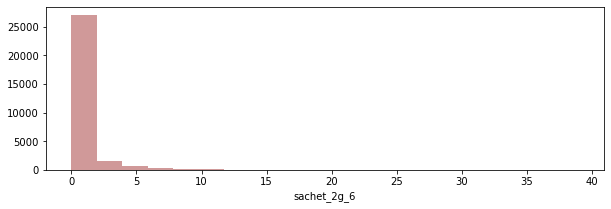

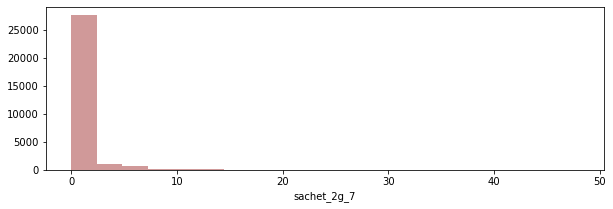

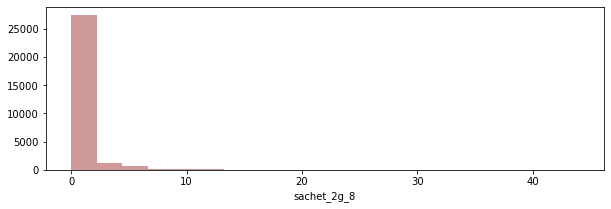

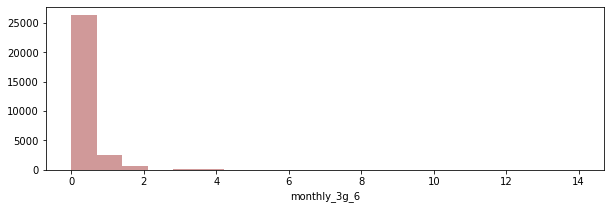

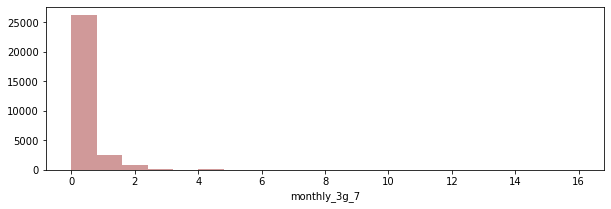

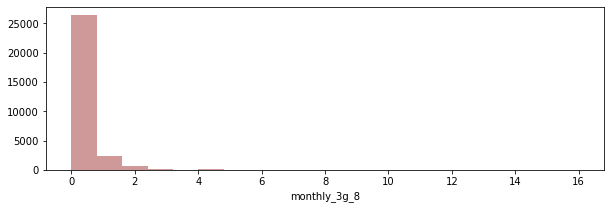

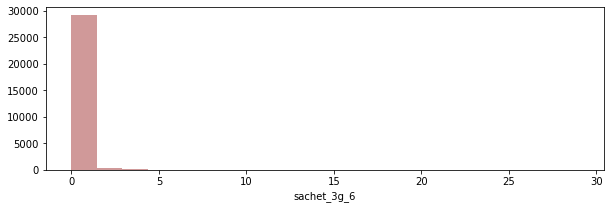

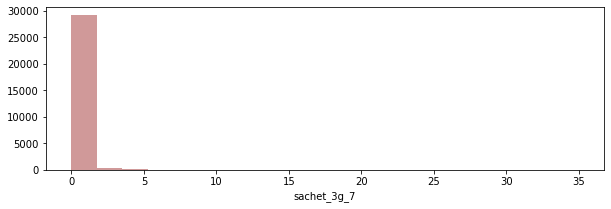

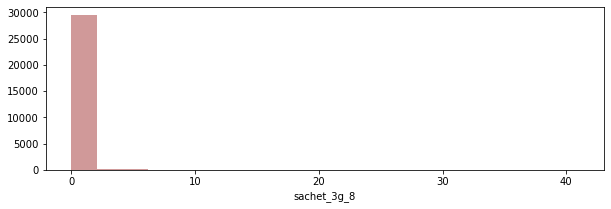

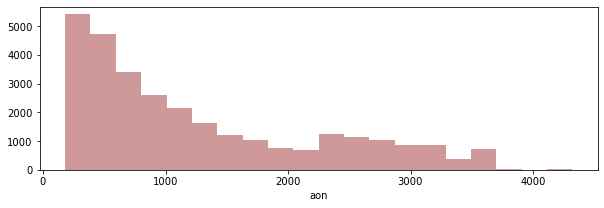

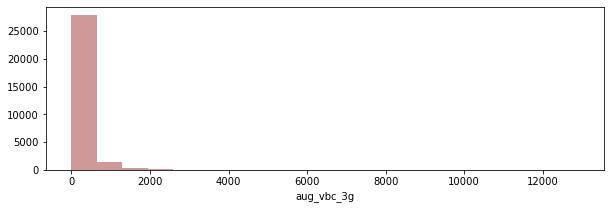

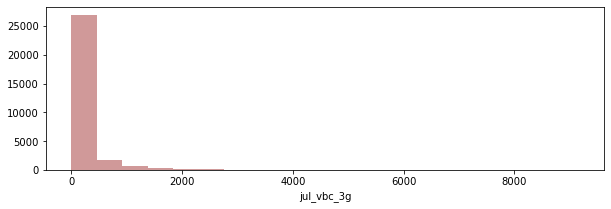

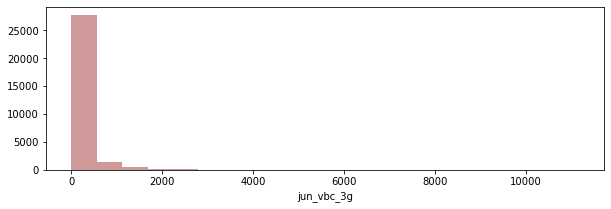

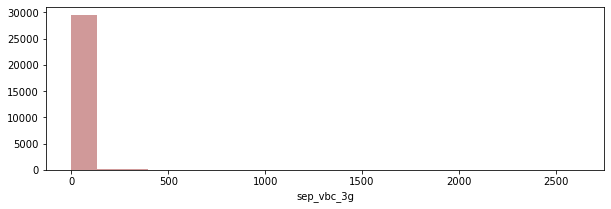

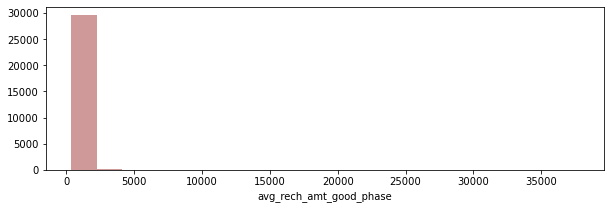

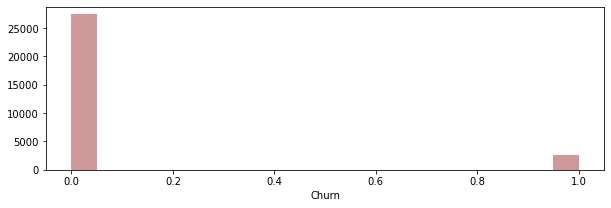

In [37]:
## Dist PLOT WITHOUT KDE ALL THE COLUMNS:
for i in x_cols:
    plt.figure(figsize=(10,3))
    sns.distplot(df[i],kde=False,bins=20,color='darkred')
    plt.show()

### Outlier Treatment

In [38]:
# Let's check for different percentile values for the different features
df.describe(percentiles=[0.10,.25,.5,.75,.90,.95])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase,Churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,587.587624,589.424681,535.067748,297.590611,305.886840,271.137938,421.142281,426.990330,383.029940,...,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,6.554528,697.014644,0.08636
std,6.846594e+05,442.848876,463.049067,492.447887,460.257092,481.318377,465.205131,468.998414,485.030117,473.464516,...,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,48.630605,488.925223,0.28090
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,369.000000,0.00000
10%,7.000269e+09,270.692200,274.458200,134.118600,12.230000,11.726000,6.906000,58.606000,59.604000,35.072000,...,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.000000,397.000000,0.00000
25%,7.000641e+09,364.352500,365.235000,289.782000,43.590000,43.370000,34.060000,142.860000,141.280000,111.780000,...,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.00000
50%,7.001232e+09,495.951000,493.781000,452.232000,128.480000,128.120000,106.390000,285.990000,285.630000,251.530000,...,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,569.000000,0.00000
75%,7.001814e+09,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,...,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,0.000000,796.000000,0.00000
90%,7.002167e+09,994.311800,996.051400,985.499200,795.354000,825.486000,724.182000,916.490000,935.716000,854.006000,...,0.000000,0.000000,0.000000,2846.000000,439.100000,455.078000,395.168000,0.000000,1118.100000,0.00000
95%,7.002287e+09,1240.976700,1261.848400,1258.703300,1154.900000,1208.691000,1115.857000,1271.757000,1287.221000,1188.523000,...,1.000000,1.000000,1.000000,3178.200000,819.257000,845.429000,762.122000,18.631000,1406.500000,1.00000


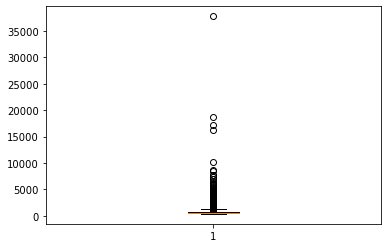

In [39]:
# Let's check for some of the columns for outliers
plt.boxplot(df.avg_rech_amt_good_phase)
plt.show()

* from boxplot, it seems there are a good number of outliers in good phase. But we will not remove as they can contribute to Churn

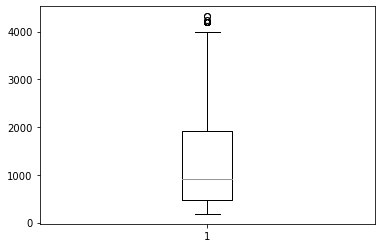

In [40]:
# Let's check for some of the columns for outliers
plt.boxplot(df.aon)
plt.show()

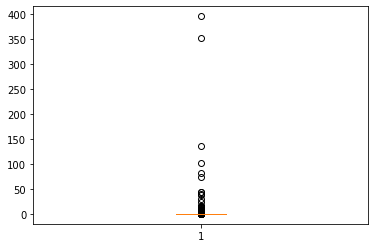

In [41]:
# Let's check for some of the columns for outliers
plt.boxplot(df.og_others_8)
plt.show()

In [42]:
# Let's check the below few columns
df.spl_ic_mou_6.describe(), df.spl_ic_mou_7.describe(), df.spl_ic_mou_8.describe()

(count    29979.000000
 mean         0.066736
 std          0.194321
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max         19.760000
 Name: spl_ic_mou_6, dtype: float64,
 count    29979.000000
 mean         0.018064
 std          0.182005
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max         21.330000
 Name: spl_ic_mou_7, dtype: float64,
 count    29979.000000
 mean         0.027609
 std          0.116422
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          6.230000
 Name: spl_ic_mou_8, dtype: float64)

In [43]:
# The above few columns have very little variance in the data, which is of no use.
# So lets drop them
df = df.drop(['spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8'], axis=1)

In [44]:
# Let's check below few columns
df.og_others_6.describe(), df.og_others_7.describe(), df.og_others_8.describe()

(count    29979.000000
 mean         0.693200
 std          2.282437
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max        100.610000
 Name: og_others_6, dtype: float64,
 count    29979.000000
 mean         0.047651
 std          2.743248
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max        370.130000
 Name: og_others_7, dtype: float64,
 count    29979.000000
 mean         0.059194
 std          3.322091
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max        394.930000
 Name: og_others_8, dtype: float64)

In [45]:
# The above few columns have very little variance in the data, which is of no use.
# So lets drop them
df = df.drop(['og_others_6','og_others_7','og_others_8'], axis=1)
df.shape

(29979, 125)


#### Relation of Churn with other Features


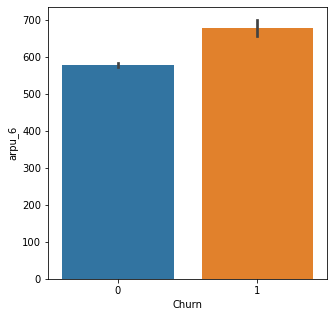

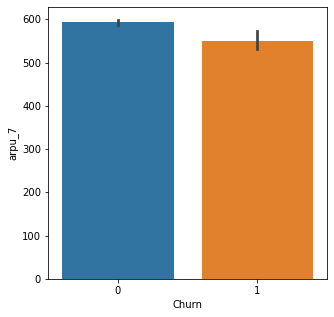

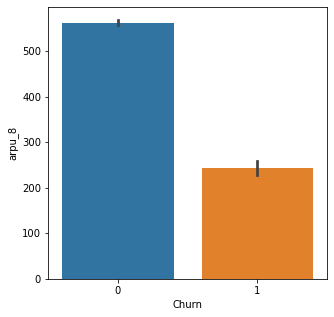

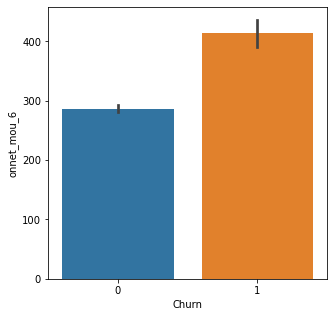

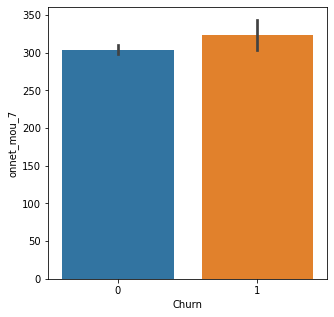

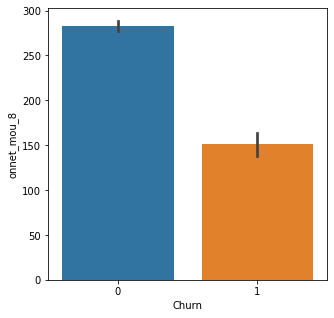

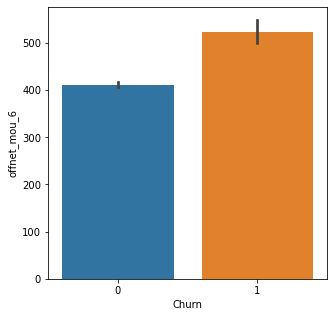

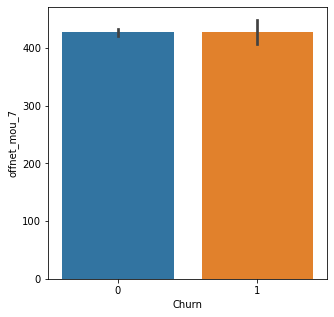

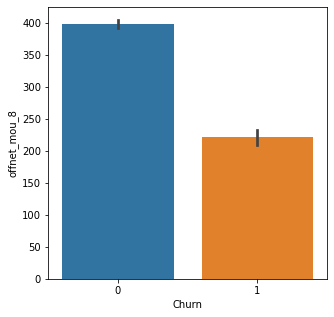

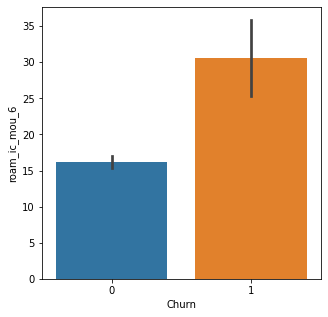

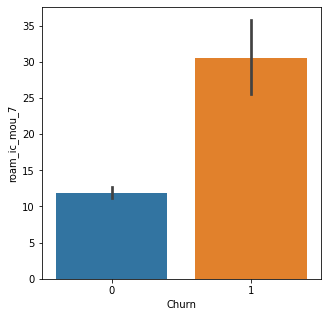

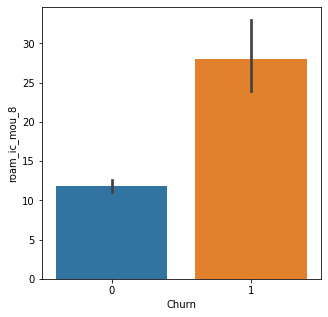

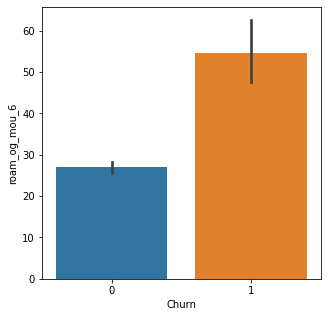

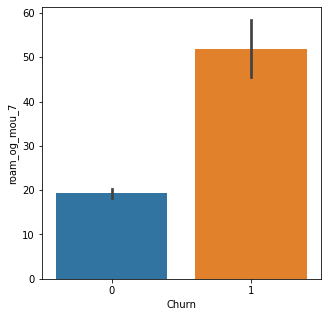

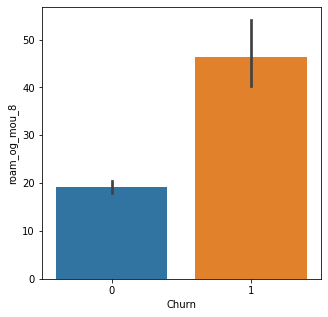

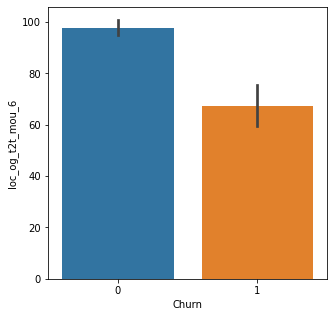

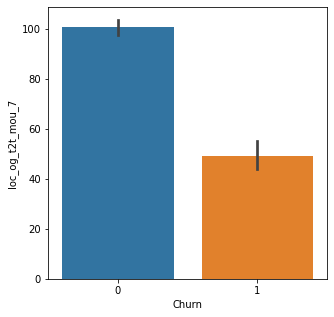

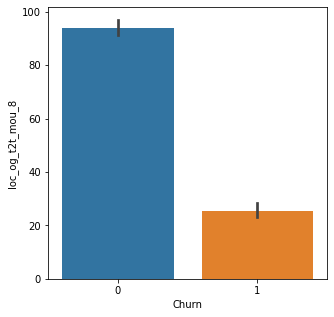

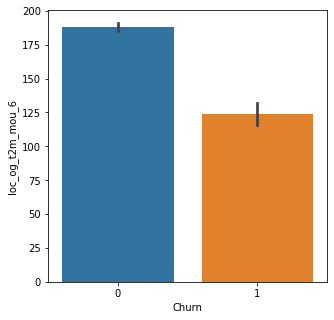

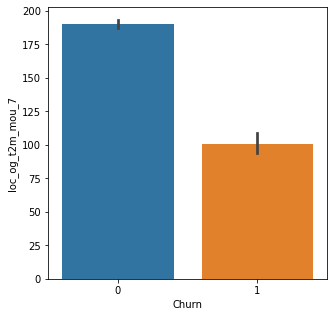

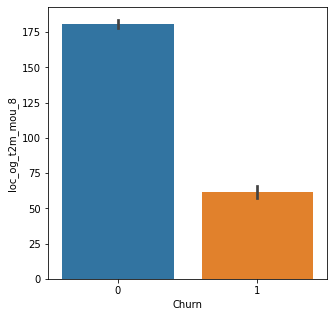

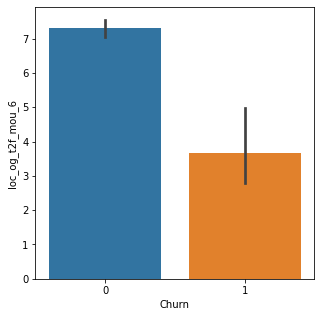

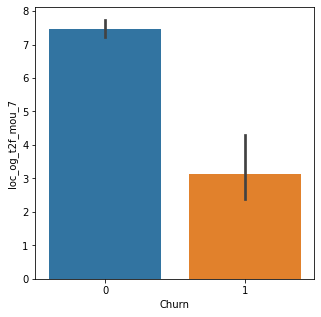

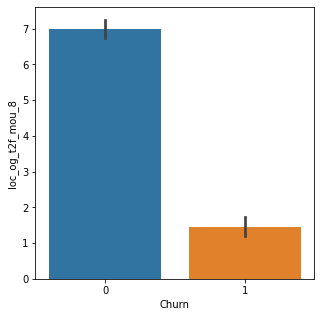

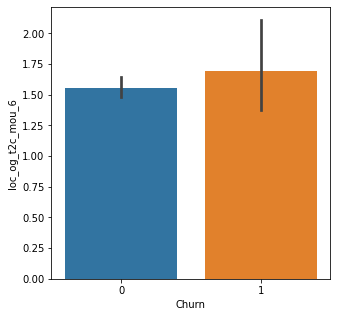

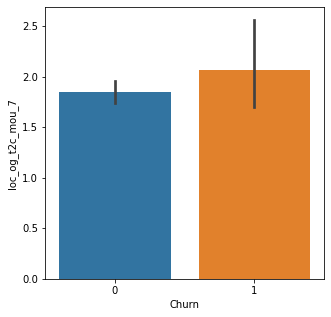

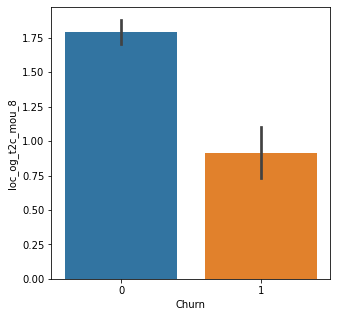

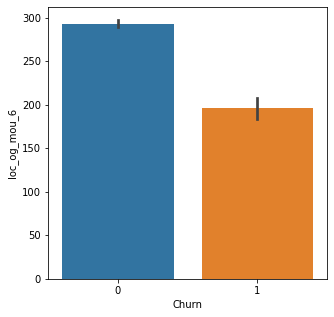

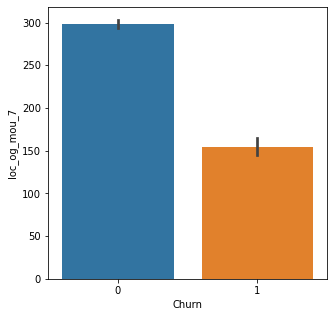

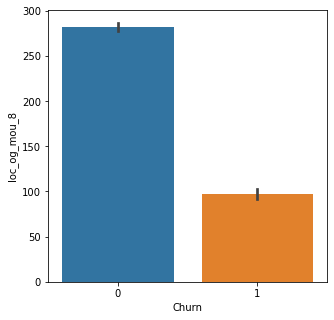

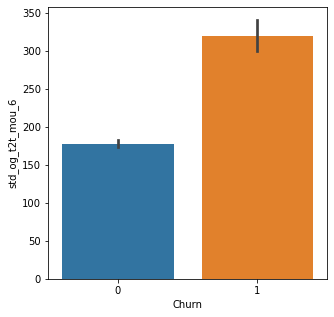

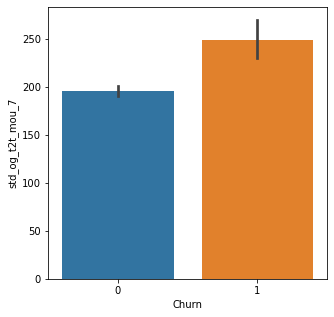

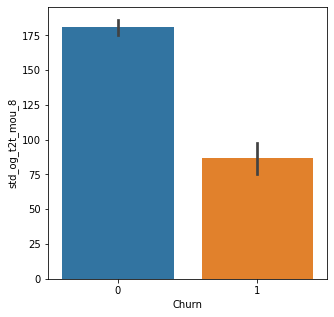

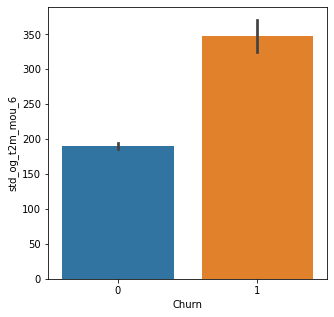

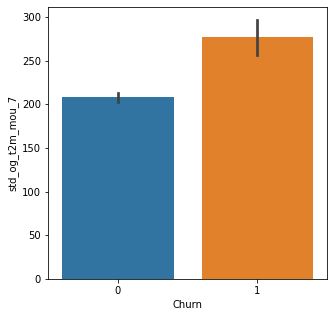

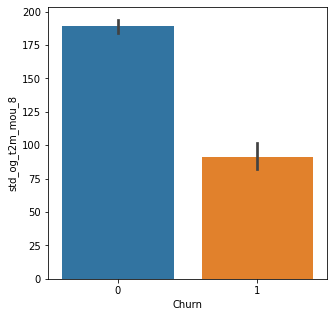

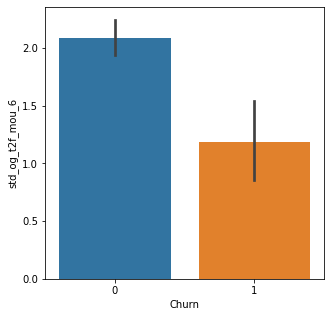

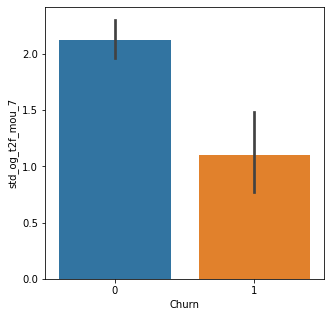

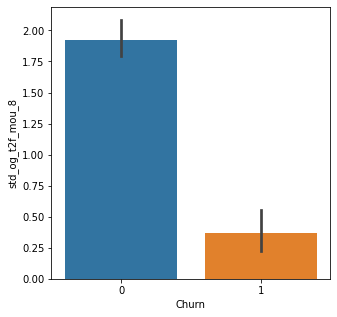

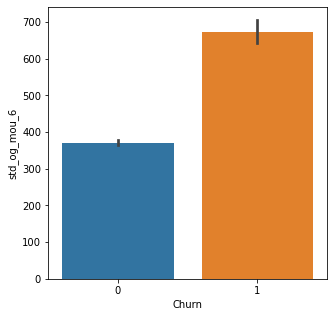

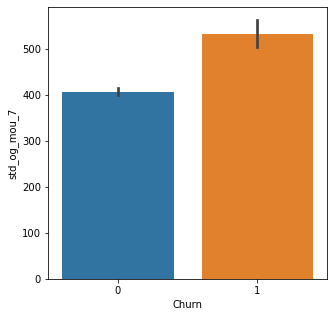

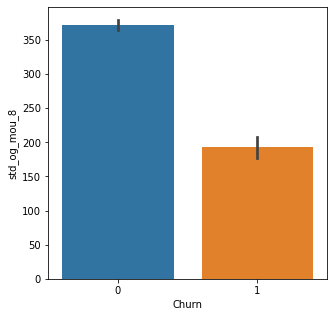

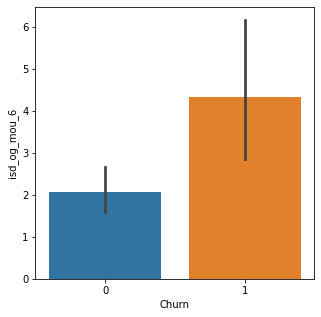

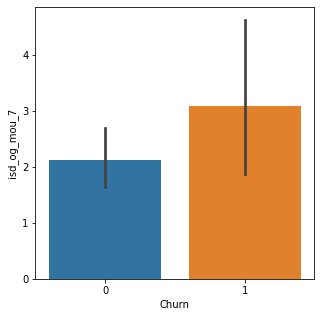

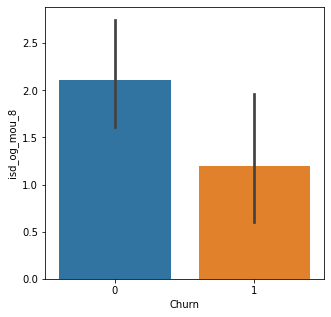

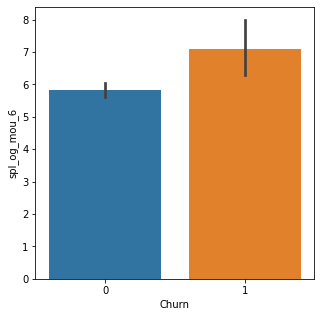

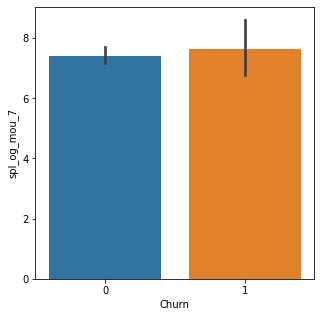

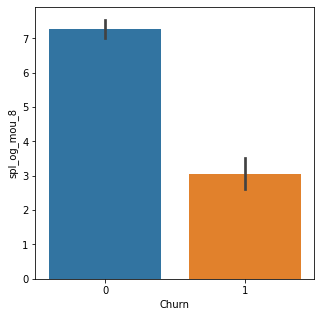

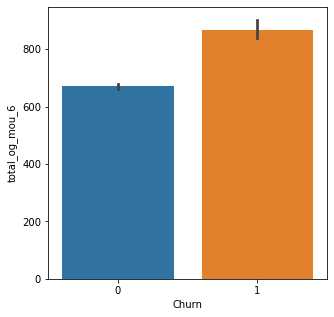

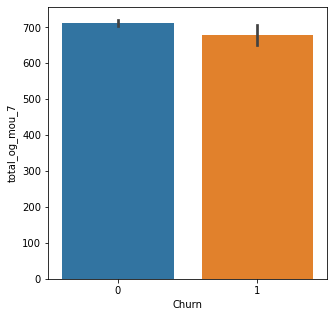

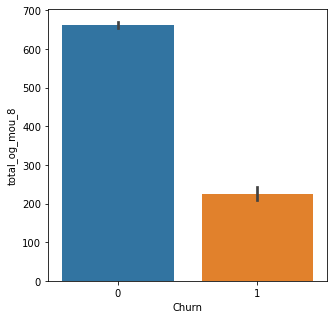

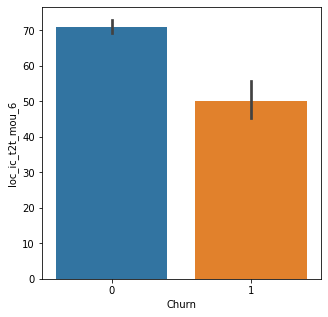

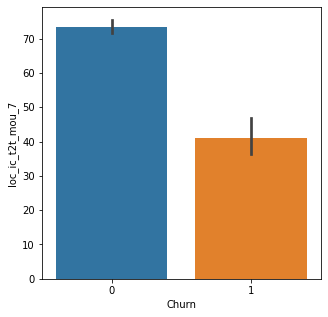

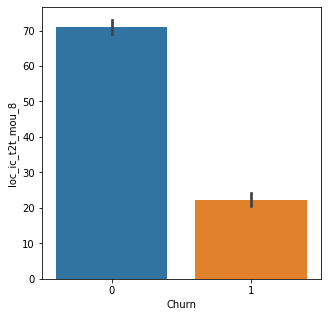

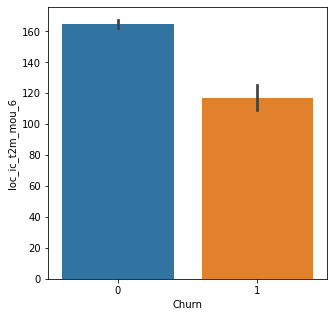

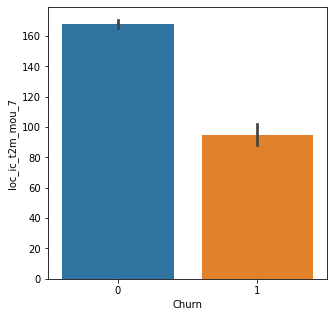

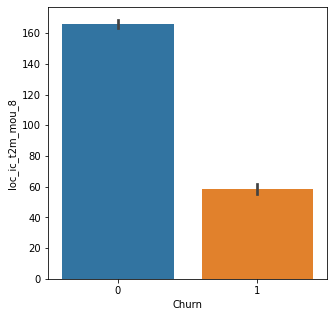

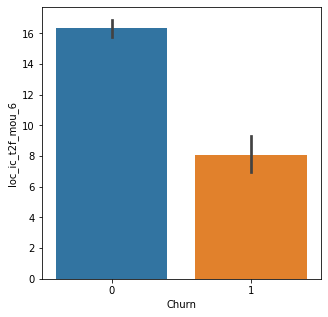

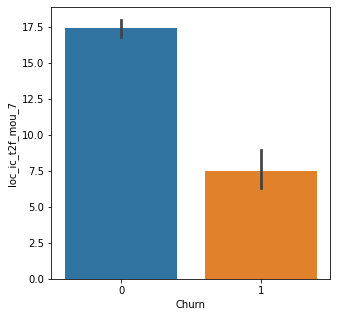

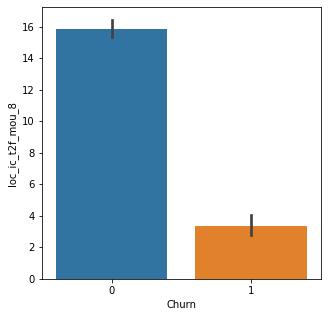

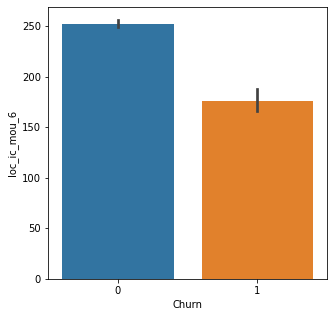

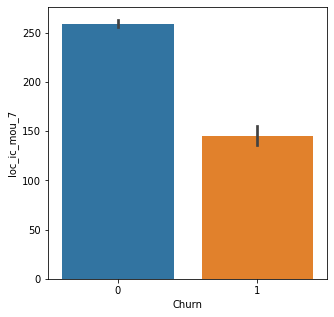

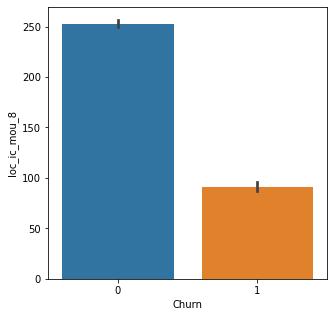

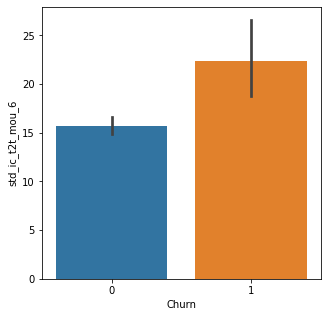

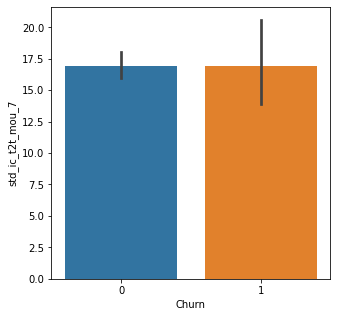

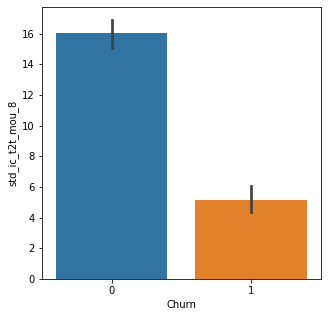

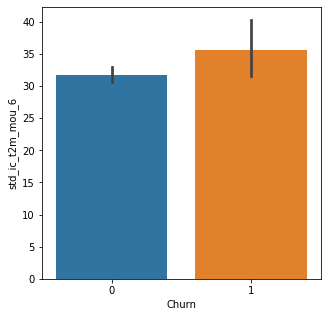

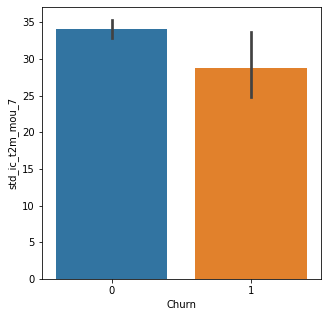

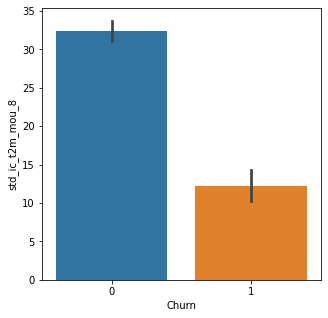

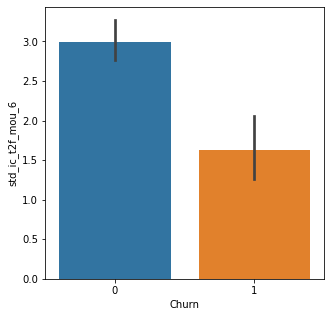

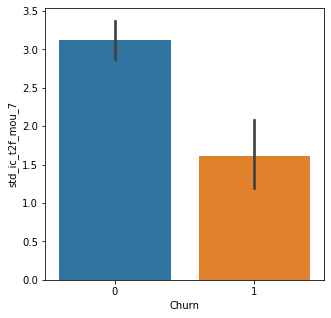

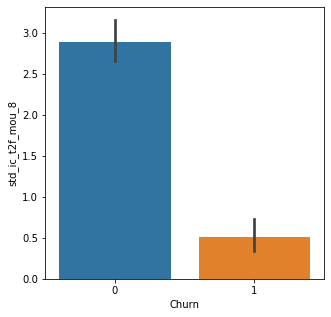

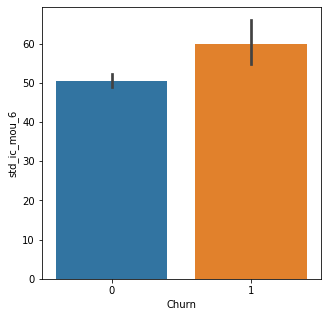

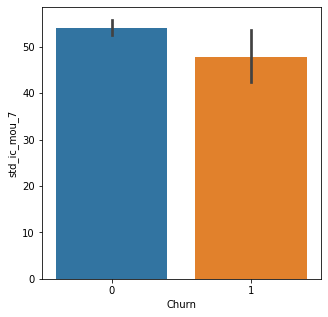

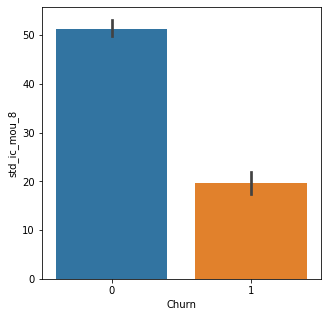

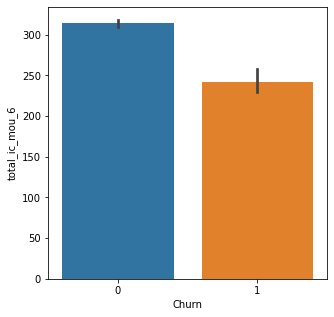

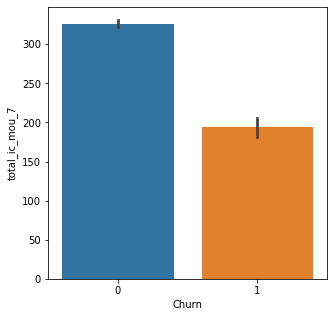

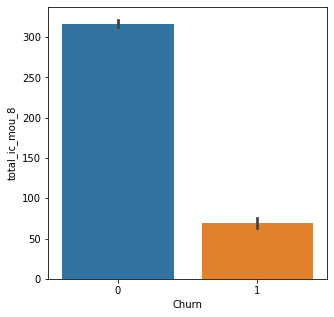

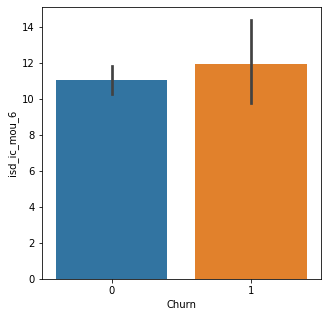

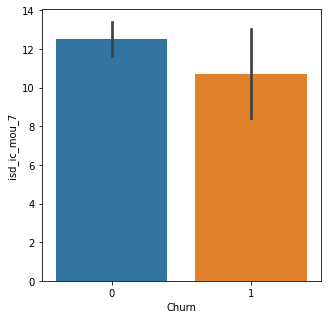

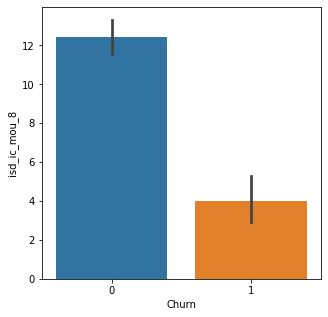

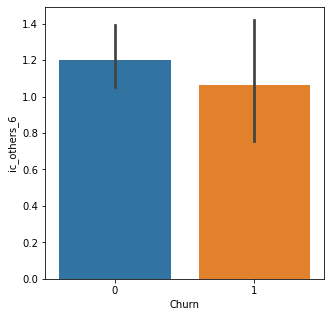

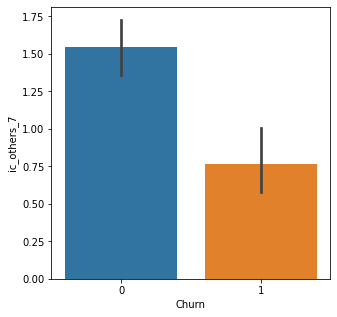

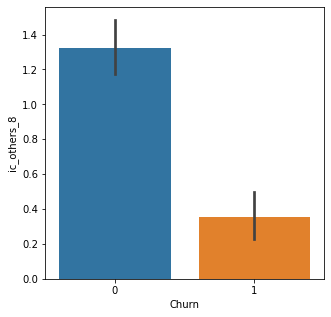

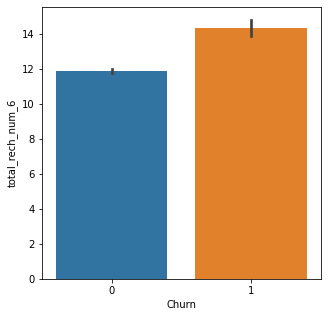

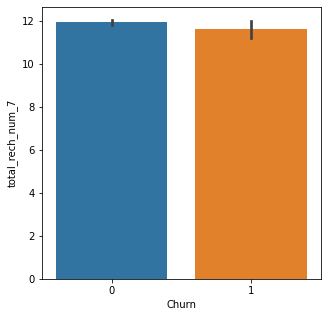

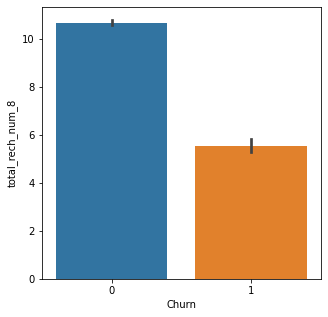

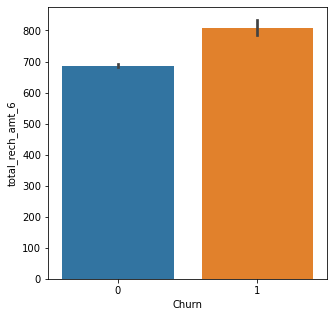

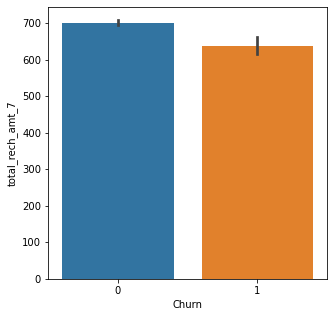

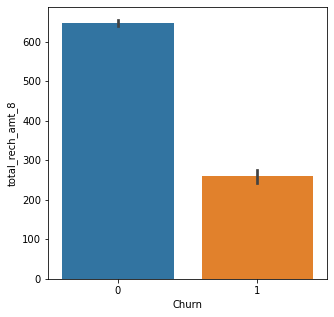

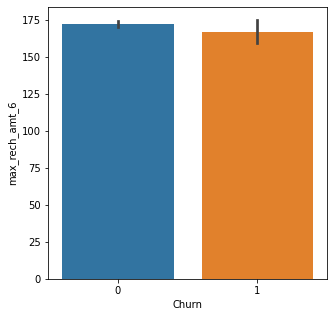

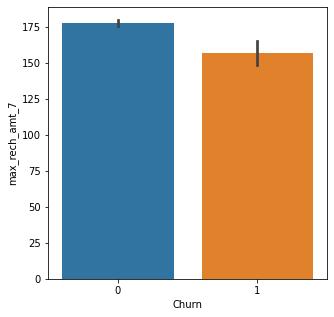

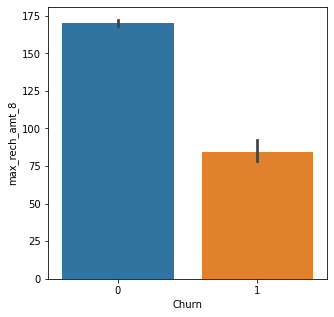

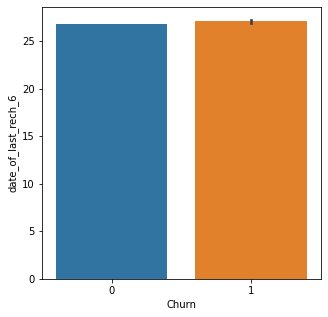

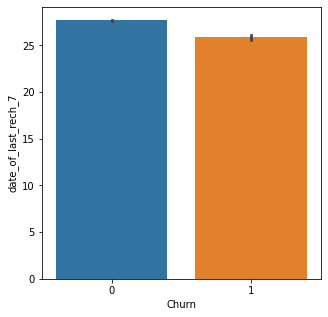

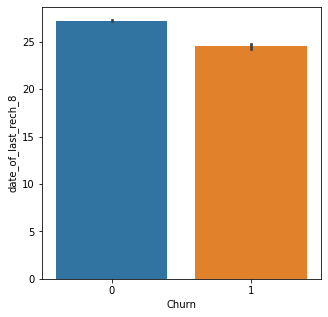

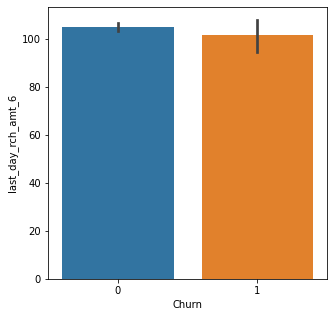

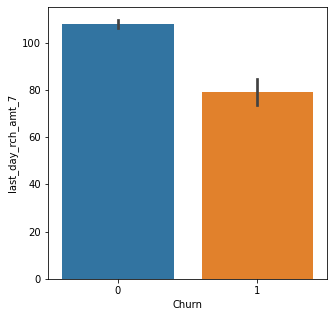

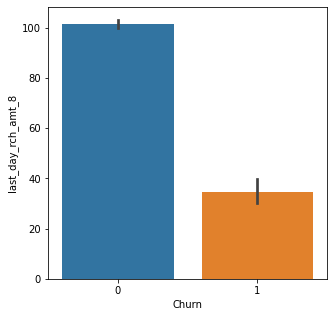

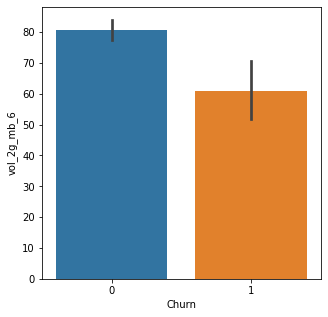

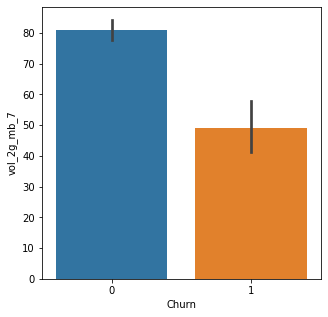

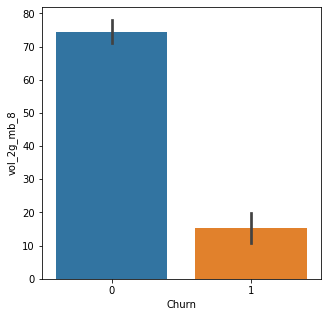

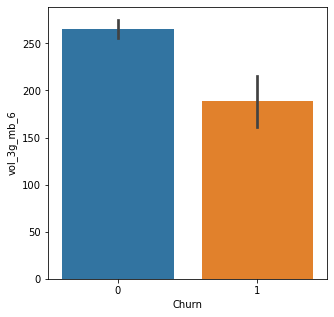

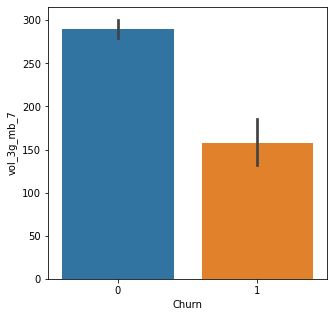

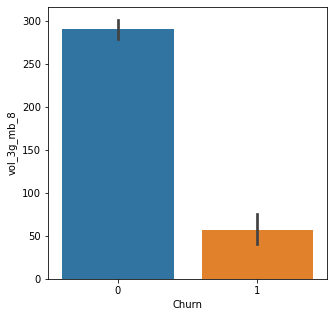

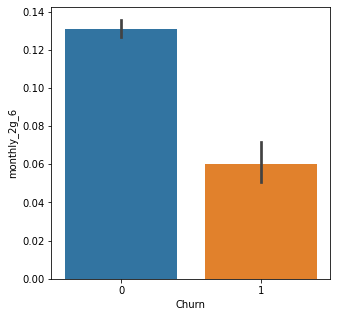

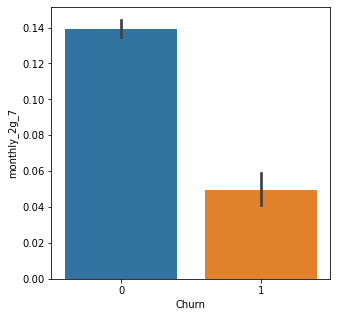

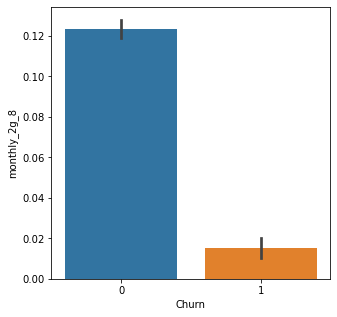

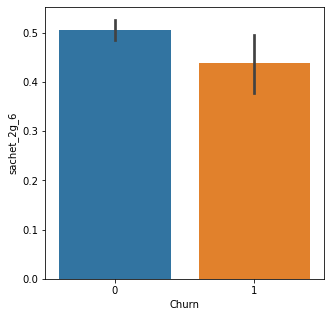

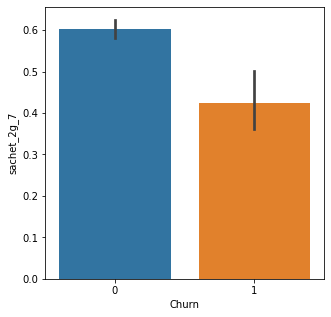

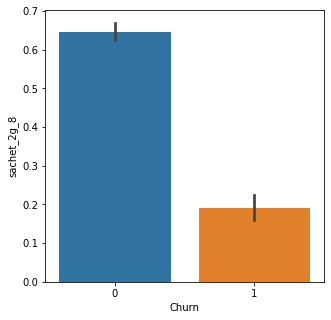

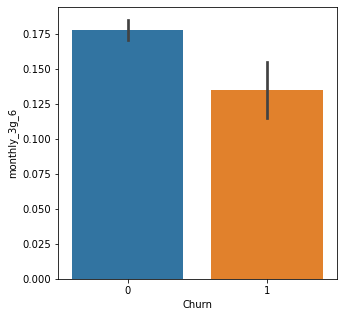

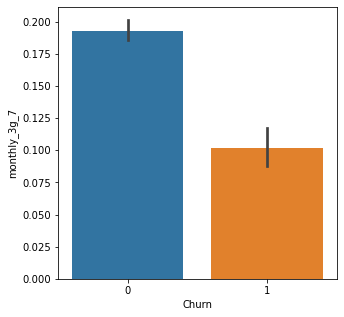

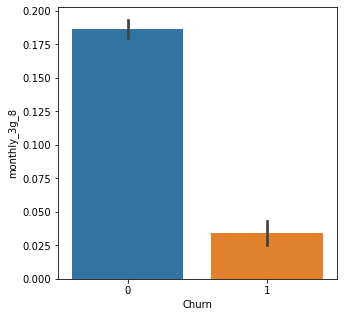

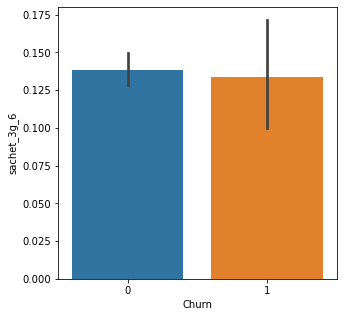

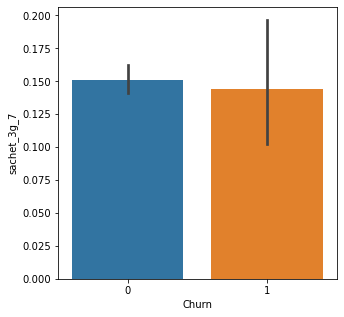

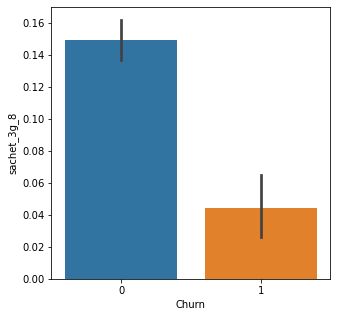

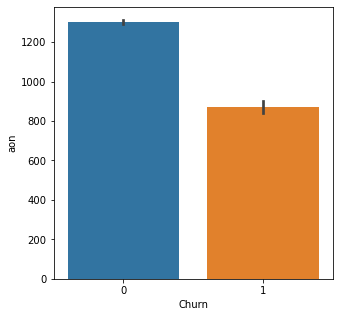

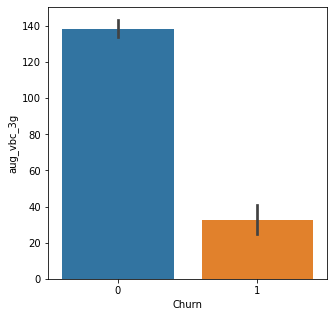

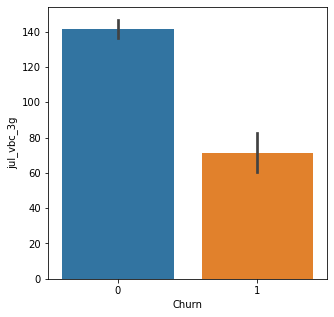

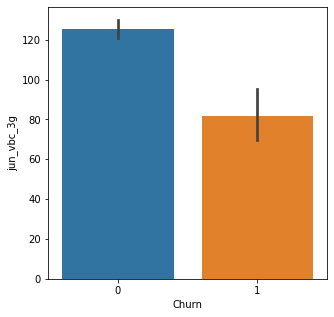

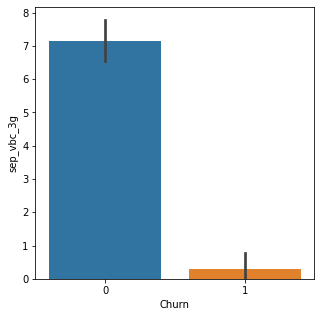

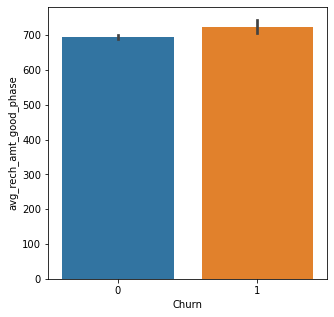

In [46]:
# As there are too many features, we have created a loop and created a barplot for all the features against Churn data
cont_cols = [col for col in df.columns if col not in ['Churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='Churn', y=col, data=df)
    plt.show()



#### Correlation among Other Feathers Excluding Churn

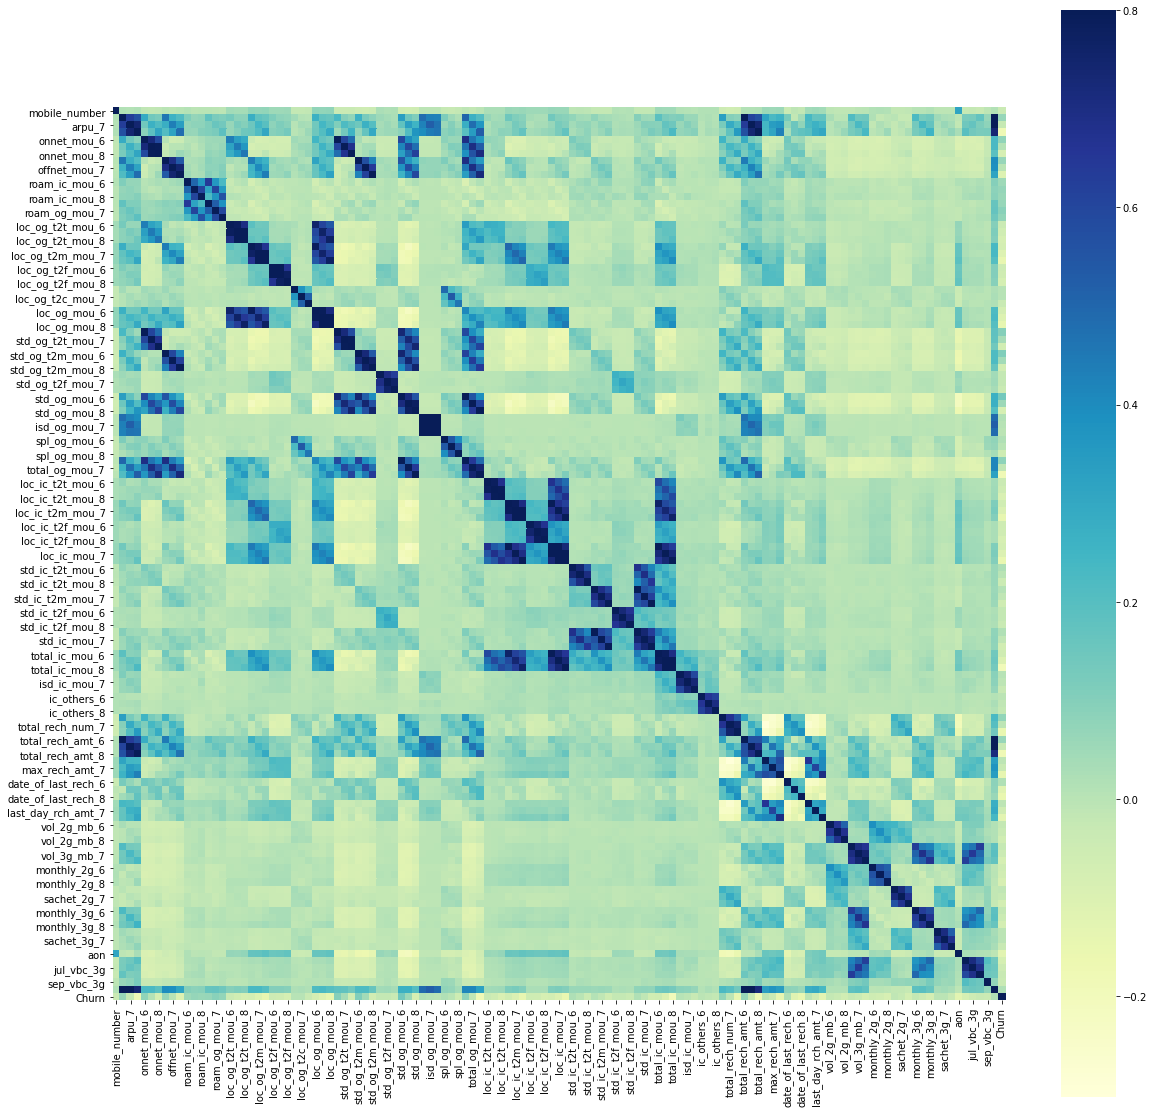

In [47]:
#Let's Plot the correlation matrix
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmatrix, vmax=.8, square=True, cmap='YlGnBu')
plt.show()

* From the above plot, nothing much can be concluded. So let's create some pairplot for some of the variables and explore the relationship

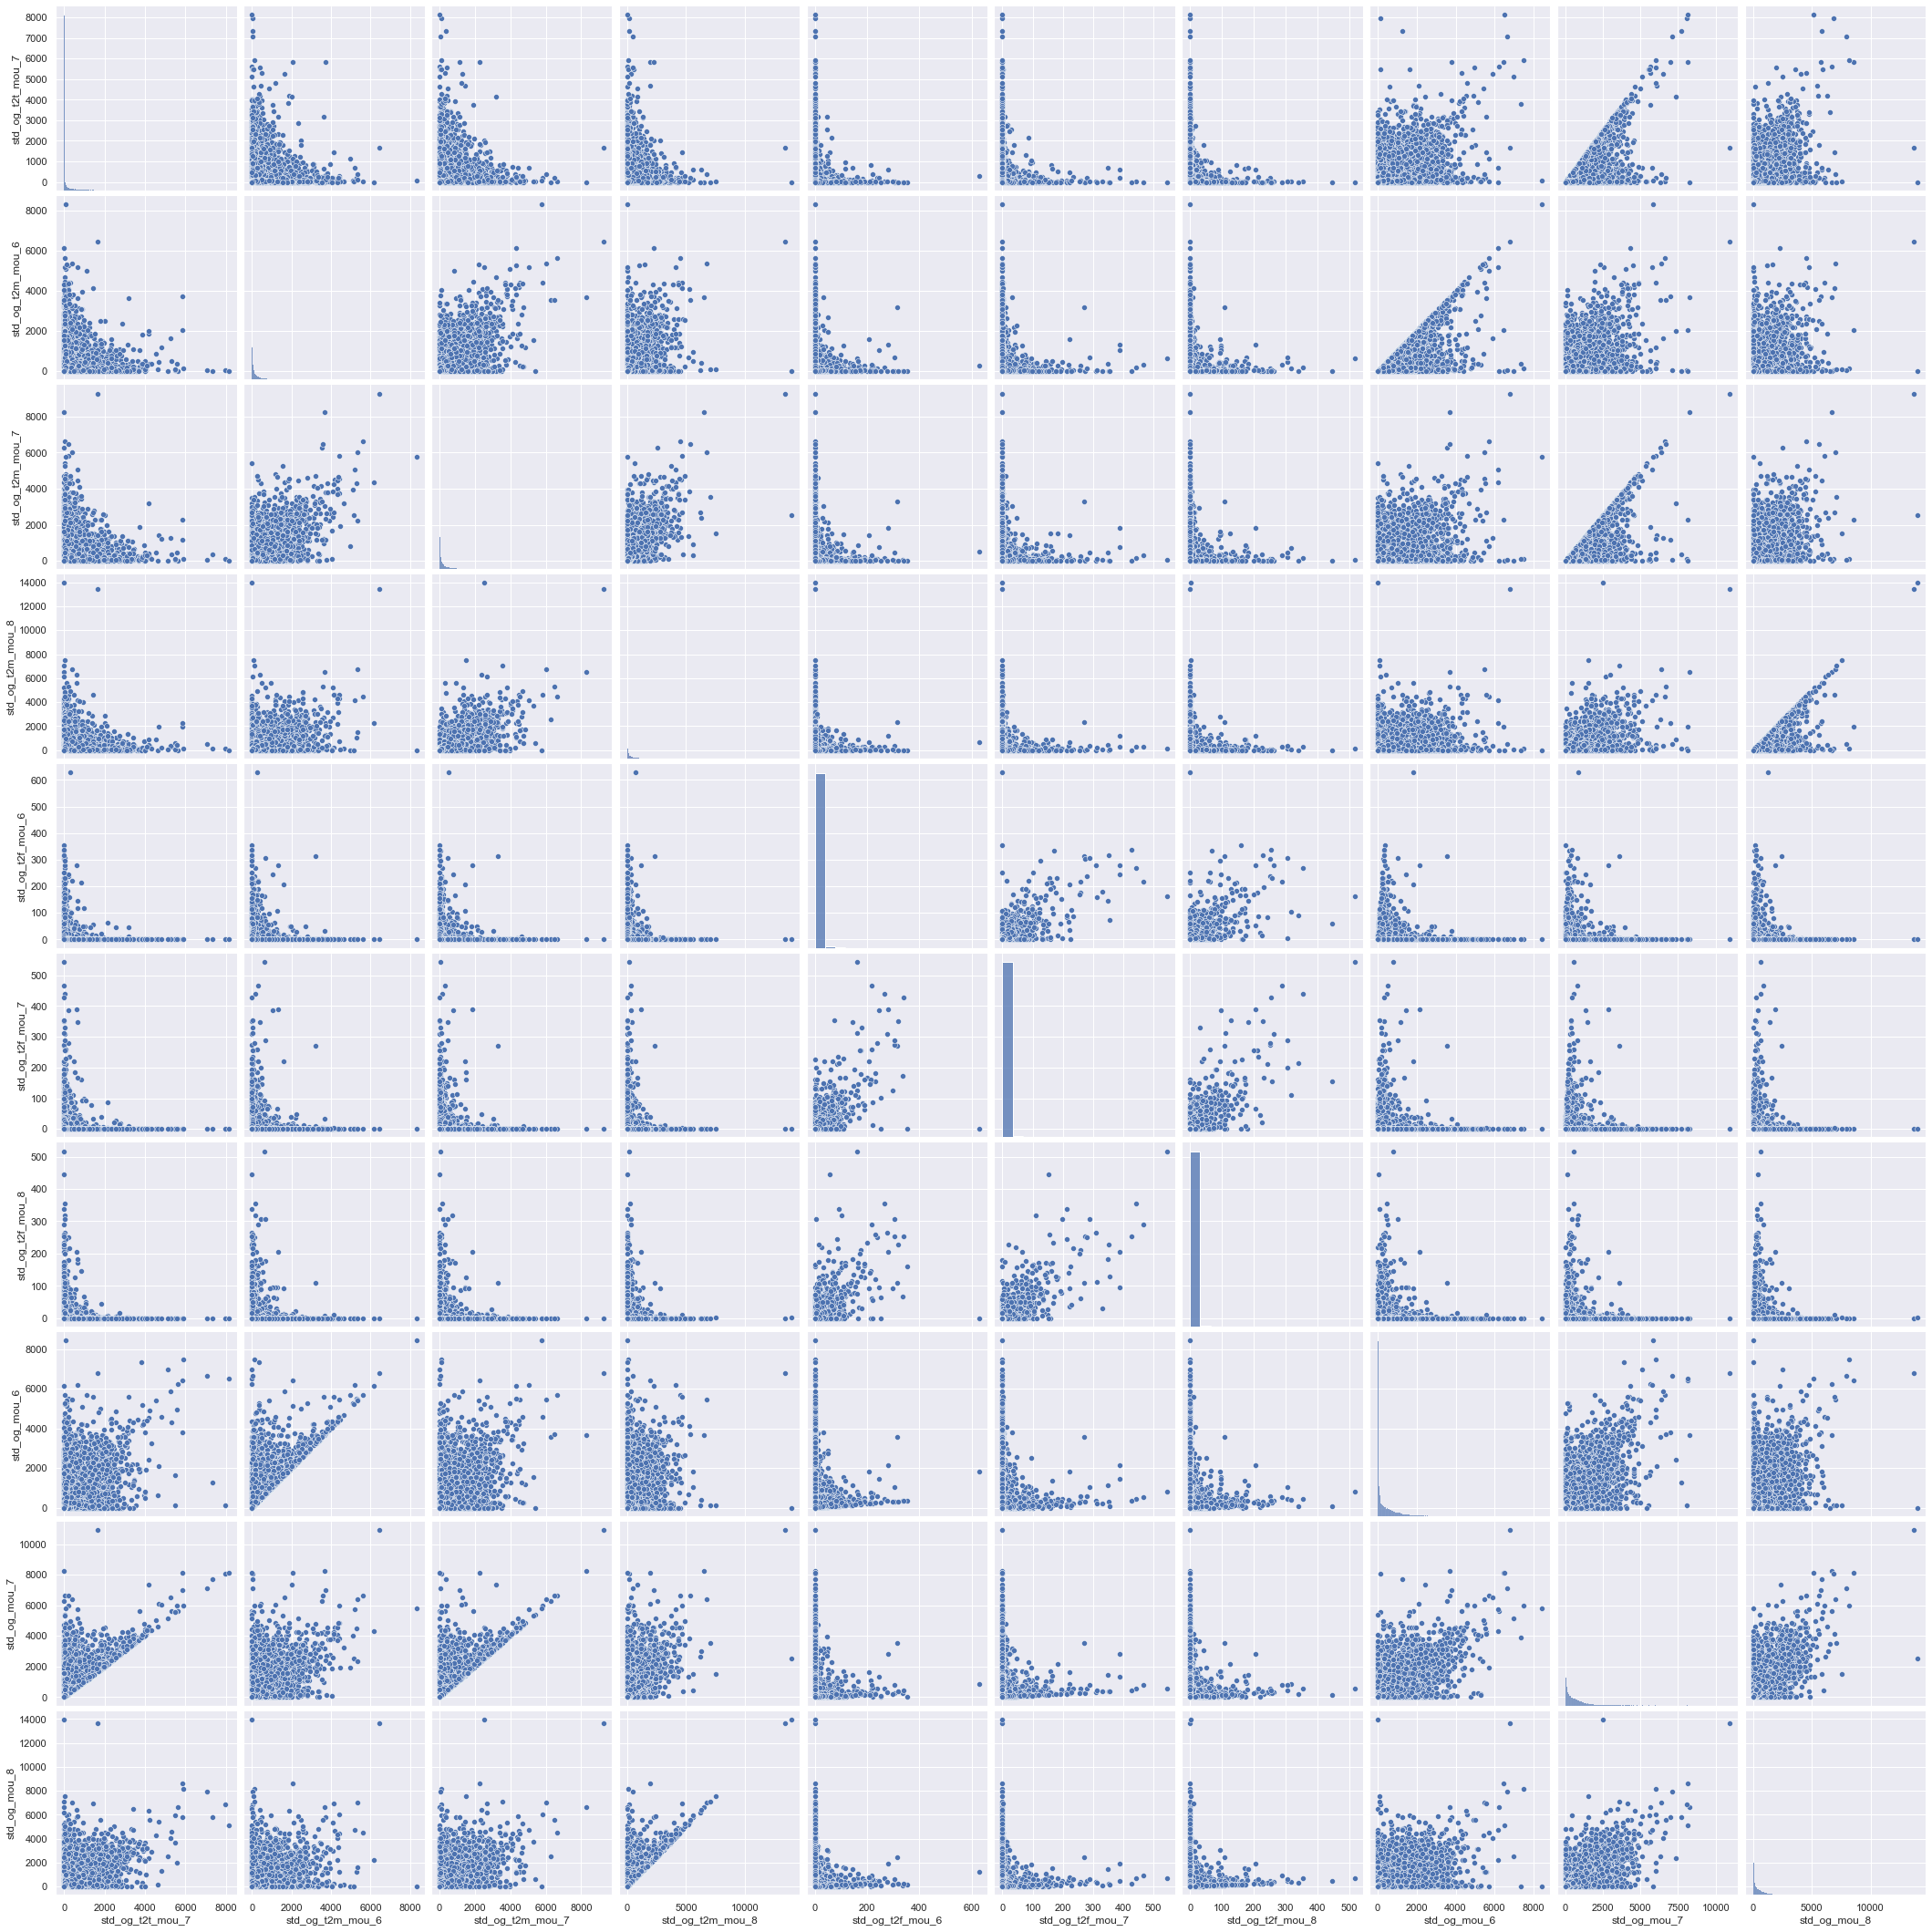

In [48]:
# pairplot among the few features
sns.set()
cols = ['std_og_t2t_mou_7','std_og_t2m_mou_6', 'std_og_t2m_mou_7','std_og_t2m_mou_8', 'std_og_t2f_mou_6','std_og_t2f_mou_7',
        'std_og_t2f_mou_8', 'std_og_mou_6' , 'std_og_mou_7' , 'std_og_mou_8']
sns.pairplot(df[cols], size = 3)
plt.show()

#### Here we can visualize correlation in some variables:  1)std_og_mou_6 and std_og_t2m_mou_6, 2) std_og_mou_8 and std_og_t2m_mou_8, 3) std_og_mou_7 and std_og_t2m_mou_7,   


<a id='eee'></a>
### Feature Engineering

#### AON (Age on network) is provided as days. Let's convert it to years (365 days) and create bins on tenure in the network.

In [49]:
# Divide AON value by 365 for convertion and rounding off to 1 decimal place
df['tenure_in_years'] = np.round(df['aon']/365, 1)

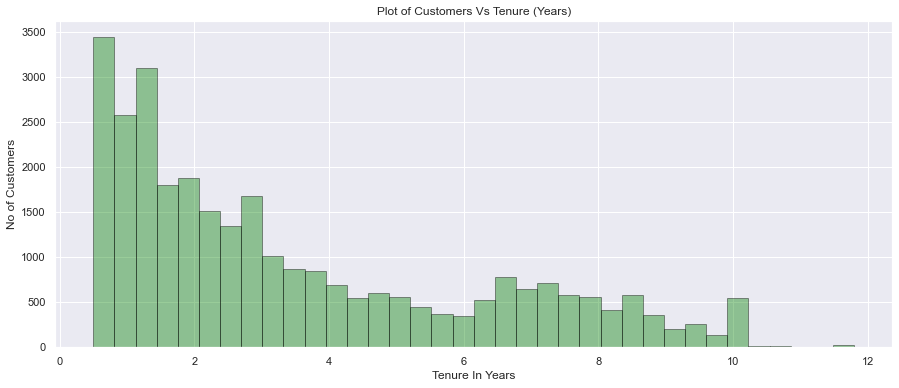

In [50]:
fig= plt.figure(figsize = (15,6))
ax_plot = sns.distplot(df['tenure_in_years'], hist=True, kde=False, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
ax_plot.set_ylabel('No of Customers')
ax_plot.set_xlabel('Tenure In Years')
ax_plot.set_title('Plot of Customers Vs Tenure (Years)')
plt.show()

* From the above plot, it is concluded that major customers are in range in 0 to 2 years. As the tenure increases, customer bases decreases. There are very few customers who are associated with the operator over 10+ years

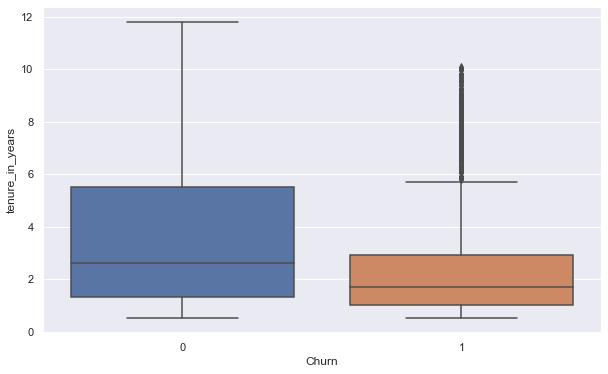

In [51]:
# plot Box plot for tenure_in_years against Churn customer data
fig= plt.figure(figsize = (10,6))
sns.boxplot(x = df.Churn, y = df.tenure_in_years)
plt.show()

#### From the above box plot, it is concluded that, customers who are associated with the operator for longer time, do not churn. In otherwords, customer who churn out, have less number of tenure with the operator

In [52]:
# Define Bins ranges
bins = [0, 1, 2, 3, 4, 5, 10]
df['tenure_in_years'] = pd.cut(df['tenure_in_years'], bins)
df['tenure_in_years'].value_counts()

(5, 10]    7675
(1, 2]     7486
(0, 1]     5320
(2, 3]     4530
(3, 4]     2962
(4, 5]     1935
Name: tenure_in_years, dtype: int64

In [53]:
# As new feature created as "tenure_bucket" -- Dropping the original feature "aon"
df.drop(['aon'], axis=1, inplace=True)
df.shape

(29979, 125)

### Correlation Analysis Among Feature Variables

#### We still left with 131 feature, which is a good number. Let's check the correlation among the variables and see if we can drop highly correlated variables and reduced the dimentiones of the data 

In [54]:
# Let's store the correlation matrix with absolute values
corr_matt = df.corr().abs()
#corr_matt

# Select upper triangle of the correlation Matrix
upper_traingle = corr_matt.where(np.triu(np.ones(corr_matt.shape), k=1).astype(np.bool))
# Finding the index of the feature with correlation greater than 0.7
feature_to_drop = [cols for cols in upper_traingle.columns if any(upper_traingle[cols] > 0.7)]
feature_to_drop

['arpu_8',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_

#### From the above list it is seen that there are quite a bit of correlated columns exist. So we can drop some of the highly correlated columns, which are less revenue generating feature

In [55]:
# Drop the above correlated feature list
df.drop(feature_to_drop, axis=1, inplace=True)
df.shape

(29979, 64)

In [56]:
# Create Dummies for tenure_in_years
df = pd.get_dummies(df, drop_first=True)
df.shape

(29979, 68)

In [57]:
# Rename the column based on the tenure_in_years value
df.rename(columns={"tenure_in_years_(1, 2]": "tenure_in_years_1_to_2","tenure_in_years_(2, 3]":"tenure_in_years_2_to_3",
                   "tenure_in_years_(3, 4]":"tenure_in_years_3_to_4",
                   "tenure_in_years_(4, 5]":"tenure_in_years_4_to_5", "tenure_in_years_(5, 10]":"tenure_in_years_5_to_10"}, inplace=True)

In [58]:
df.shape

(29979, 68)

In [59]:
df.head()

,mobile_number,arpu_6,arpu_7,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,sachet_3g_8,aug_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,tenure_in_years_1_to_2,tenure_in_years_2_to_3,tenure_in_years_3_to_4,tenure_in_years_4_to_5,tenure_in_years_5_to_10
7,7000701601,1069.180,1349.850,57.84,453.43,567.16,16.23,33.49,31.64,23.74,...,0,57.74,18.74,0.0,1,0,1,0,0,0
8,7001524846,378.721,492.223,413.69,94.66,80.63,0.00,0.00,0.00,0.00,...,0,21.03,122.16,0.0,0,0,0,0,0,0
13,7002191713,492.846,205.671,501.76,413.31,119.28,23.53,144.24,72.11,7.98,...,0,0.00,0.00,0.0,0,0,0,0,0,1
16,7000875565,430.975,299.869,50.51,296.29,229.74,0.00,2.83,0.00,0.00,...,0,0.00,21.89,0.0,0,1,0,0,0,0
17,7000187447,690.008,18.980,1185.91,61.64,0.00,0.00,4.76,4.81,0.00,...,0,0.00,0.00,0.0,0,1,0,0,0,0


<a id='nnn'></a>
### Feature Scaling

In [60]:
X = df.drop(['Churn', 'mobile_number'], axis=1)
y = df['Churn']
X.shape,y.shape

((29979, 66), (29979,))

In [61]:
# defining a normalisation function 
def normalize_feature (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize_feature( ) to all columns 
X_normalized = X.apply(normalize_feature) 
X_normalized.head()

,arpu_6,arpu_7,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,...,sachet_3g_6,sachet_3g_8,aug_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure_in_years_1_to_2,tenure_in_years_2_to_3,tenure_in_years_3_to_4,tenure_in_years_4_to_5,tenure_in_years_5_to_10
7,0.110967,0.090525,0.007841,0.054223,0.058669,0.006211,0.008782,0.007588,0.006289,0.004477,...,0.0,0.0,0.004470,0.001678,0.0,0.0,1.0,0.0,0.0,0.0
8,0.087944,0.067446,0.056081,0.011320,0.008341,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.001628,0.010940,0.0,0.0,0.0,0.0,0.0,0.0
13,0.091750,0.059734,0.068019,0.049425,0.012339,0.009004,0.037826,0.017293,0.002114,0.012539,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
16,0.089687,0.062269,0.006847,0.035431,0.023765,0.000000,0.000742,0.000000,0.000000,0.006309,...,0.0,0.0,0.000000,0.001960,0.0,1.0,0.0,0.0,0.0,0.0
17,0.098324,0.054710,0.160764,0.007371,0.000000,0.000000,0.001248,0.001154,0.000000,0.003008,...,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0


#### Splitting Data into Training and Test Sets

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, train_size=0.7, test_size=0.3, random_state=100)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20985, 66), (8994, 66), (20985,), (8994,))

In [65]:
print("Before OverSampling, counts of label '1' in Train Data Set: {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0' in Train Data Set: {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1' in Train Data Set: 1774
Before OverSampling, counts of label '0' in Train Data Set: 19211 



In [66]:
print("Before OverSampling, counts of label '1' in Test Data Set: {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0' in Test Data Set: {} \n".format(sum(y_test==0)))

Before OverSampling, counts of label '1' in Test Data Set: 815
Before OverSampling, counts of label '0' in Test Data Set: 8179 



<a id='balance'></a>
### Balancing the Dataset

In [67]:
# Importing the SMOTE
from imblearn.over_sampling import SMOTE
oversampler_sm = SMOTE(random_state=0)
X_train_sm,y_train_sm = oversampler_sm.fit_resample(X_train,y_train)

In [68]:
print("After OverSampling, counts of label '1' in Train Data Set: {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0' in Train Data Set: {} \n".format(sum(y_train_sm==0)))

After OverSampling, counts of label '1' in Train Data Set: 19211
After OverSampling, counts of label '0' in Train Data Set: 19211 



In [69]:
# Calculating the Imbalance on the data after performing the oversampling
imbalance_on_train_data = (y_train_sm != 0).sum()/(y_train_sm == 0).sum()
print("After completing the OverSampling imbalance in the Train Data : ",imbalance_on_train_data)

After completing the OverSampling imbalance in the Train Data :  1.0


<a id='fff'></a>
### Applying PCA on the Dataset


In [70]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [71]:
# Applying PCA
pca.fit_transform(X_train_sm)

array([[-3.50110996e-01,  7.58408977e-01, -3.29355678e-01, ...,
        -8.57136775e-03, -7.60865470e-05,  3.59989765e-03],
       [-3.58101417e-01,  7.48496526e-01, -3.30026088e-01, ...,
        -8.92590926e-04, -1.60053174e-04,  1.68937321e-03],
       [-5.26643319e-01, -6.59406411e-01, -2.38584544e-01, ...,
        -1.52766095e-03,  4.04210762e-05, -1.82099440e-03],
       ...,
       [-1.05748994e-01,  3.59666560e-02,  1.83633376e-01, ...,
         2.15361792e-04,  4.63975334e-04,  3.02627245e-04],
       [-1.63499784e-01,  8.50216420e-02,  8.47779039e-01, ...,
        -1.11507354e-03, -1.27350741e-04, -8.68994968e-04],
       [-1.02684691e-01,  4.35774865e-02,  1.69385926e-01, ...,
         2.31548556e-03,  6.31481610e-04,  7.72149629e-04]])

#### Let's plot the principal components and try to make sense of them

In [72]:
# List of PCA components
pca.components_

array([[ 5.50040312e-04,  3.61083211e-04,  1.10889746e-02, ...,
        -6.16481641e-02, -3.21996722e-02, -4.19172081e-01],
       [ 5.32886731e-04, -4.00951583e-04,  1.36501966e-02, ...,
         4.01566671e-02,  1.78859581e-02, -6.91617326e-01],
       [ 1.80114249e-04, -1.17976868e-04,  6.08609643e-03, ...,
         6.78273183e-01,  1.74735732e-01, -4.13727602e-01],
       ...,
       [-4.25909089e-01,  8.67485231e-01, -2.04268408e-03, ...,
         5.69164442e-05,  3.03051786e-04,  2.91392323e-04],
       [-3.26279175e-02, -3.16814482e-02,  3.72984457e-03, ...,
         9.89910783e-05,  5.07292078e-04, -1.30008136e-04],
       [-4.98933769e-01, -8.34089722e-02,  4.20108783e-02, ...,
         5.36456616e-04,  6.29844091e-04,  3.74434737e-04]])

In [73]:
# Let's check the variance ratio
pca.explained_variance_ratio_

array([3.05538446e-01, 2.31055215e-01, 1.43459839e-01, 8.65210867e-02,
       5.18760627e-02, 4.09998407e-02, 3.79640459e-02, 2.49164342e-02,
       1.24861489e-02, 7.39257741e-03, 6.26847452e-03, 5.72145943e-03,
       4.59817430e-03, 4.43756204e-03, 3.14267206e-03, 2.97004088e-03,
       2.64583003e-03, 2.42643836e-03, 2.16424457e-03, 1.78772073e-03,
       1.35457092e-03, 1.26333659e-03, 1.22293909e-03, 1.18238822e-03,
       1.10986836e-03, 1.07575275e-03, 1.00696218e-03, 9.56557437e-04,
       8.61403046e-04, 7.93254011e-04, 7.89312020e-04, 7.39540650e-04,
       7.07636065e-04, 6.70164814e-04, 6.41014396e-04, 5.91853449e-04,
       5.11554929e-04, 4.46939655e-04, 4.28956007e-04, 4.10148568e-04,
       3.79063359e-04, 3.59683687e-04, 3.19299716e-04, 2.94010583e-04,
       2.89457554e-04, 2.81295439e-04, 2.51935057e-04, 2.29625308e-04,
       2.24213725e-04, 2.17388649e-04, 2.11790880e-04, 2.02515775e-04,
       1.95578410e-04, 1.84982930e-04, 1.76504999e-04, 1.60041221e-04,
      

In [74]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.000550,0.000533,0.000180,0.000607,0.001014,-0.003600,0.005180,-0.012154,-0.000156,0.086753,arpu_6
1,0.000361,-0.000401,-0.000118,-0.000356,-0.008372,0.003934,-0.009024,0.002015,0.002754,0.072763,arpu_7
2,0.011089,0.013650,0.006086,0.000788,-0.000594,-0.012482,-0.018929,-0.086007,-0.087910,-0.216549,onnet_mou_6
3,0.005113,0.008701,-0.002016,-0.000940,-0.011733,-0.017654,-0.004879,-0.066558,-0.046915,0.581017,offnet_mou_6
4,0.003442,0.004440,-0.002459,-0.002404,-0.034836,0.006184,-0.043470,-0.015356,-0.036027,0.456224,offnet_mou_7


#### Understanding how the original variables are loaded on the principal components. It can be verified from above as well.

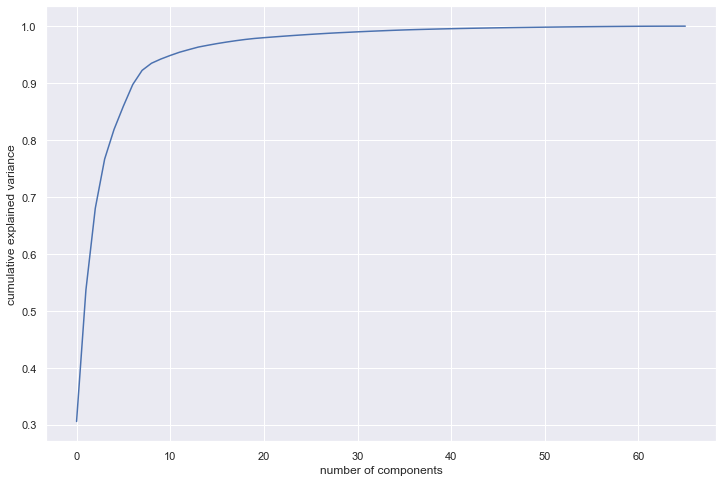

In [75]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()

#### Looking at the screeplot to assess the number of principal components and variance. 
#### 25 components are enough to describe more than 95% of the variance in the dataset
- We will choose 25 components for modeling

In [76]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

#### Basis transformation - getting the data onto our PCs

In [77]:
#df_train_pca = pca_final.fit_transform(X_train)
df_train_pca = pca_final.fit_transform(X_train_sm)
df_train_pca.shape

(38422, 25)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [78]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

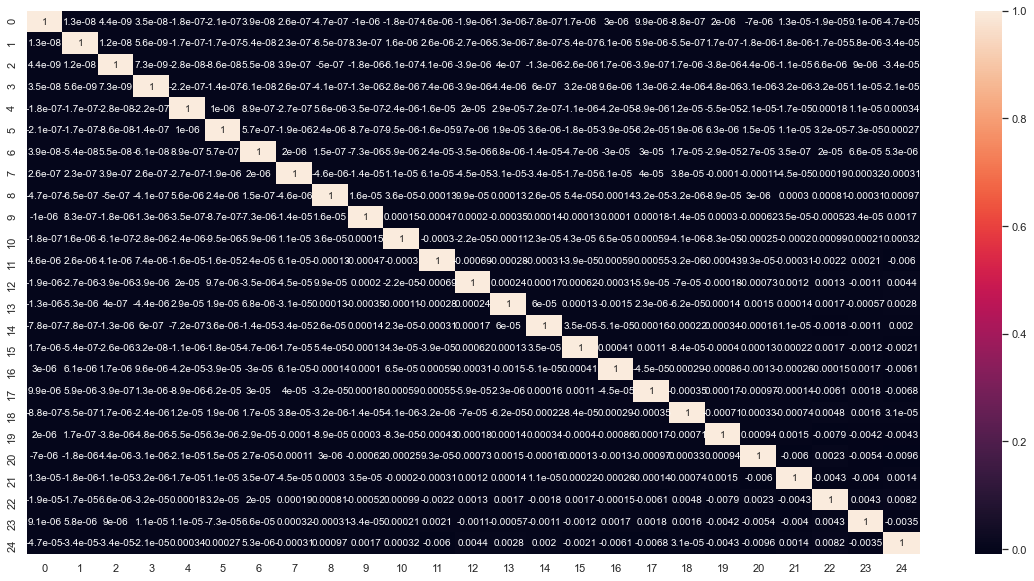

In [79]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(corrmat, annot = True)
plt.show()

In [80]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.00821788279828462 , min corr:  -0.009576852906160787


#### There is no correlation between any two components!
- We have effectively removed multicollinearity and our models will be much more stable

In [81]:
#Applying selected components to the test data - 25 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 25)

### Logistic Regression with PCA

- From the Churn Distribution plot above it is observed that only 8.6% customer churn out and the rest of the customer did not churn. The data is highly imbalanced. We need to do the class imbalance with class_width = balanced to balance the data

In [82]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

#learner_pca = LogisticRegression(class_weight='balanced')
logistic_pca = LogisticRegression()
model_pca_logistic = logistic_pca.fit(df_train_pca,y_train_sm)

In [83]:
prediction_probs_test = model_pca_logistic.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, prediction_probs_test))

'0.81'

In [84]:
#Making prediction on the test data
prediction_test_logistic = model_pca_logistic.predict_proba(df_test_pca)
y_pred_default_logistic = model_pca_logistic.predict(df_test_pca)

In [85]:
# Import the required packages from sklearn
from sklearn.metrics import confusion_matrix, accuracy_score

In [86]:
# print(classification_report(y_test,y_pred_default_logistic))
print(confusion_matrix(y_test,y_pred_default_logistic))
print(accuracy_score(y_test,y_pred_default_logistic))

[[6231 1948]
 [ 212  603]]
0.7598398932621748


In [87]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(prediction_test_logistic)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [88]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.Churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8140582983354799


### ROC Curve

In [89]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

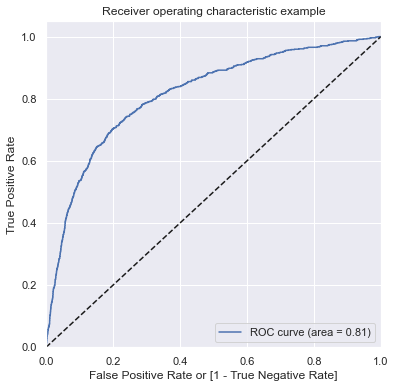

(array([0.00000000e+00, 1.22264335e-04, 1.22264335e-04, ...,
        9.99755471e-01, 9.99877736e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00122699, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99840308e+00, 9.98403077e-01, 9.97350107e-01, ...,
        2.89616091e-07, 1.56915267e-07, 1.37915994e-07]))

In [90]:
draw_roc(y_pred_final.Churn, y_pred_final.churn_prob)

In [91]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.151205,1,1,0,0,0,0,0,0,0,0
1,0,0.335363,1,1,1,1,0,0,0,0,0,0
2,0,0.292095,1,1,1,0,0,0,0,0,0,0
3,0,0.423994,1,1,1,1,1,0,0,0,0,0
4,0,0.936766,1,1,1,1,1,1,1,1,1,1


In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.234712  0.161389  0.970552
0.2   0.2  0.366133  0.308228  0.947239
0.3   0.3  0.498332  0.458736  0.895706
0.4   0.4  0.635757  0.615845  0.835583
0.5   0.5  0.759840  0.761829  0.739877
0.6   0.6  0.845008  0.869544  0.598773
0.7   0.7  0.885590  0.928598  0.453988
0.8   0.8  0.900044  0.962343  0.274847
0.9   0.9  0.907716  0.985573  0.126380


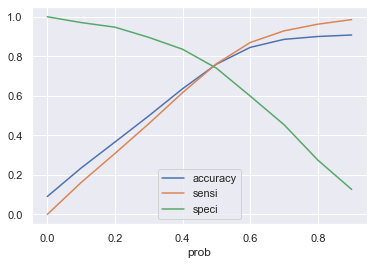

In [93]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [94]:
# Finidng the optimal cutoff
def find_the_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = find_the_Optimal_Cutoff(y_pred_final.Churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.4912449219085568]


- Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0

In [95]:
# Creating new column 'pred_churn' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.Churn.value_counts()

0    8179
1     815
Name: Churn, dtype: int64

### Confusion matrix

In [96]:
# Confusion matrix 
confusion_logistic_regression = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.pred_churn )
confusion_logistic_regression

array([[6116, 2063],
       [ 204,  611]], dtype=int64)

In [97]:
print(accuracy_score(y_test,y_pred_final.pred_churn))

0.7479430731598844


#### Matrics Values - Logistic Regression Model With PCA

In [98]:
TP = confusion_logistic_regression[1,1] # true positive 
TN = confusion_logistic_regression[0,0] # true negatives
FP = confusion_logistic_regression[0,1] # false positives
FN = confusion_logistic_regression[1,0] # false negatives

print('Accuracy Score: ', accuracy_score(y_test,y_pred_final.pred_churn))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall: ', TP / float(TP+FN))

# positive predictive value 
print('Precision: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.7479430731598844
Sensitivity/Recall:  0.7496932515337423
Precision:  0.22849663425579655
Specificity:  0.7477686758772466
false postive rate:  0.2522313241227534
Negative predictive value:  0.9677215189873418
Misclassification Rate:  0.25205692684011566


<a id='rfe'></a>
### LogistcRegression With RFE (10 Features)
- We are selecting 10 features

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Using another technique to balance the data
logreg_rfe = LogisticRegression(class_weight='balanced')
# Selecting 10 most significant features
rfe_logistic = RFE(logreg_rfe, 10)
rfe_logistic = rfe_logistic.fit(X_normalized,y)
print(rfe_logistic.support_)                      

[ True False False False False False False False False  True  True False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False  True False False False False False  True False False False False
 False False  True False  True False False  True False False False False
  True False False False False False]


In [100]:
print(rfe_logistic.ranking_)

[ 1 26 15  8 47 56 18  4 39  1  1 14  3 19 53 28 16 55 40 32 57 20  1 23
 41  5 27 48 30 24 37 54 29 17 42  2  9  1 52 21  7 45 10  1 36 33 11 13
 43 34  1 12  1 35 25  1 31 22  6 44  1 50 51 49 46 38]


In [101]:
col = X.columns[rfe_logistic.support_]
col

Index(['arpu_6', 'roam_og_mou_7', 'roam_og_mou_8', 'spl_og_mou_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

In [102]:
import statsmodels.api as sm
# UDF for calculating vif value
def calculate_vif(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Feature', 'VIF'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False)

#### Correlation matrix

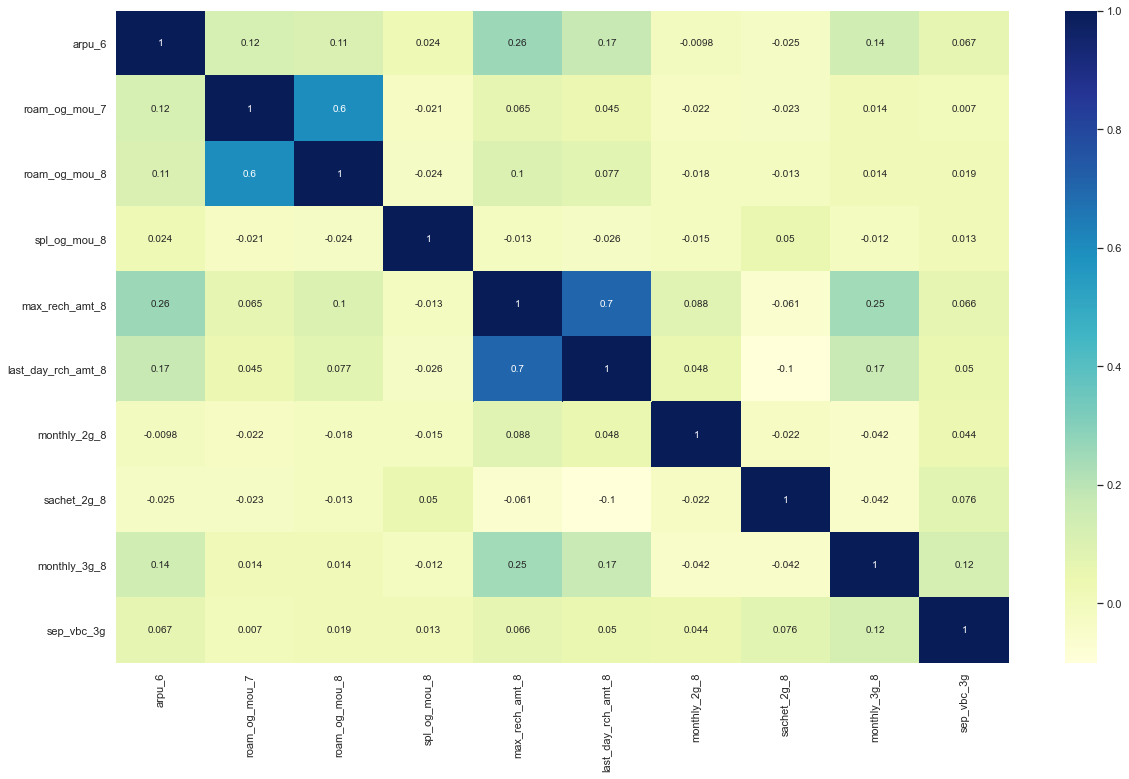

In [103]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,12))        # Size of the figure
sns.heatmap(X_normalized[col].corr(),annot = True, cmap = 'YlGnBu')
plt.show()

#### Check VIF value

In [104]:
col_for_vif = list(col)
col_for_vif.append('Churn')
calculate_vif(input_data=df[col_for_vif], dependent_col='Churn')

,Feature,VIF
4,max_rech_amt_8,3.81
5,last_day_rch_amt_8,2.83
0,arpu_6,1.95
1,roam_og_mou_7,1.64
2,roam_og_mou_8,1.63
8,monthly_3g_8,1.19
6,monthly_2g_8,1.09
7,sachet_2g_8,1.08
3,spl_og_mou_8,1.07
9,sep_vbc_3g,1.05


- VIF looks good as all the values are less than 5. Now will select these coloums for creating LogisticRegression Model

In [105]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

#### ROC_AUC score

In [106]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.83'

In [107]:
#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [108]:
# Import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78      8179
           1       0.19      0.84      0.31       815

    accuracy                           0.66      8994
   macro avg       0.58      0.74      0.54      8994
weighted avg       0.90      0.66      0.73      8994

[[5277 2902]
 [ 133  682]]
accuracy_score :  0.6625528129864354


In [109]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [110]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.Churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8315806528315445


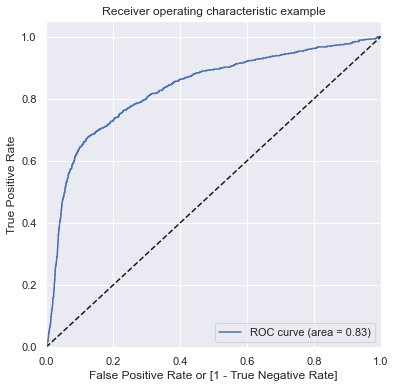

(array([0.00000000e+00, 1.22264335e-04, 2.44528671e-04, ...,
        9.99755471e-01, 9.99877736e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([1.99864769e+00, 9.98647688e-01, 9.97877546e-01, ...,
        7.71228172e-07, 2.32252735e-07, 9.70676198e-08]))

In [111]:
draw_roc(y_pred_final.Churn, y_pred_final.churn_prob)

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.483701,1,1,1,1,1,0,0,0,0,0
1,0,0.445730,1,1,1,1,1,0,0,0,0,0
2,0,0.430689,1,1,1,1,1,0,0,0,0,0
3,0,0.332063,1,1,1,1,0,0,0,0,0,0
4,0,0.974791,1,1,1,1,1,1,1,1,1,1


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.148543  0.065045  0.986503
0.2   0.2  0.244052  0.172026  0.966871
0.3   0.3  0.335446  0.274606  0.946012
0.4   0.4  0.447298  0.400049  0.921472
0.5   0.5  0.662553  0.645189  0.836810
0.6   0.6  0.874361  0.897176  0.645399
0.7   0.7  0.904937  0.983494  0.116564
0.8   0.8  0.905826  0.992909  0.031902
0.9   0.9  0.907272  0.996577  0.011043


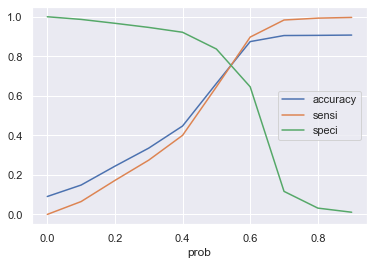

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [115]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.Churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.5511514370579941]


In [116]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.55 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.55 else 0)
y_pred_final.Churn.value_counts()

0    8179
1     815
Name: Churn, dtype: int64

In [117]:
# Confusion matrix 
confusion_rfe = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.pred_churn)
confusion_rfe

array([[6215, 1964],
       [ 192,  623]], dtype=int64)

#### Matrics Values - Logistic Regression Model With RFE

In [118]:
TP = confusion_rfe[1,1] # true positive 
TN = confusion_rfe[0,0] # true negatives
FP = confusion_rfe[0,1] # false positives
FN = confusion_rfe[1,0] # false negatives

print('Accuracy Score: ', accuracy_score(y_test,y_pred_final.pred_churn))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall: ', TP / float(TP+FN))

# positive predictive value 
print('Precision: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.7602846342005781
Sensitivity/Recall:  0.7644171779141105
Precision:  0.24081948202551218
Specificity:  0.7598728450910869
false postive rate:  0.24012715490891307
Negative predictive value:  0.9700327766505384
Misclassification Rate:  0.23971536579942185


### DecisionTree with PCA

In [119]:
# Importing decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Fit the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(df_train_pca,y_train_sm)

DecisionTreeClassifier(max_depth=5)

In [120]:
# Let's check the evaluation metrics of our default Decision Tree model

# Making predictions
y_pred_default_dt = dt_default.predict(df_test_pca)

print(classification_report(y_test,y_pred_default_dt))
print(confusion_matrix(y_test,y_pred_default_dt))
print('Acuracy Score', accuracy_score(y_test,y_pred_default_dt))

              precision    recall  f1-score   support

           0       0.97      0.66      0.78      8179
           1       0.19      0.79      0.30       815

    accuracy                           0.67      8994
   macro avg       0.58      0.72      0.54      8994
weighted avg       0.90      0.67      0.74      8994

[[5360 2819]
 [ 174  641]]
Acuracy Score 0.6672225928396709


In [121]:
confusion_matt_defauly_dt = confusion_matrix(y_test,y_pred_default)
TP = confusion_matt_defauly_dt[1,1] # true positive 
TN = confusion_matt_defauly_dt[0,0] # true negatives
FP = confusion_matt_defauly_dt[0,1] # false positives
FN = confusion_matt_defauly_dt[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall: ', TP / float(TP+FN))

# positive predictive value 
print('Precision: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.6625528129864354
Sensitivity/Recall:  0.8368098159509203
Precision:  0.19029017857142858
Specificity:  0.6451888983983372
false postive rate:  0.3548111016016628
Negative predictive value:  0.9754158964879852
Misclassification Rate:  0.3374471870135646


#### As we see above that Sensitivity/ Recall(Churn Correctly Detected) is 0.83, which is good. Let's see if we can futher increase it by tuning hyperparameters

### Hyperparameter Tuning for DecisionTree Classifier

In [122]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [123]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train_sm)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', verbose=1)

In [124]:
# cv results final
cv_results_final = pd.DataFrame(grid_search.cv_results_)
cv_results_final.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.433567,0.030834,0.003590,7.977728e-04,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.738321,0.739102,0.749219,0.74974,0.741281,0.743533,0.004954,301
1,1.405241,0.029174,0.002992,9.172146e-07,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.738321,0.739102,0.749219,0.74974,0.741281,0.743533,0.004954,301
2,1.380307,0.012312,0.002793,3.990893e-04,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.738321,0.739102,0.749219,0.74974,0.741281,0.743533,0.004954,301
3,1.383100,0.016296,0.002993,7.168434e-07,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.738321,0.739102,0.749219,0.74974,0.741281,0.743533,0.004954,301
4,1.391878,0.010299,0.002992,9.246216e-07,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.738321,0.739102,0.749219,0.74974,0.741281,0.743533,0.004954,301


In [125]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8194524444239727
DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5)


In [126]:
# model with optimal hyperparameters
clf_gini_final = DecisionTreeClassifier(criterion = "gini",random_state = 100, max_depth=10, min_samples_leaf=5, min_samples_split=10)
clf_gini_final.fit(df_train_pca,y_train_sm)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=100)

In [127]:
y_pred_default_dt = clf_gini_final.predict(df_test_pca)
confusion_matrix_hyper=confusion_matrix(y_test,y_pred_default_dt)
confusion_matrix_hyper

array([[6455, 1724],
       [ 281,  534]], dtype=int64)

In [128]:
TP = confusion_matrix_hyper[1,1] # true positive 
TN = confusion_matrix_hyper[0,0] # true negatives
FP = confusion_matrix_hyper[0,1] # false positives
FN = confusion_matrix_hyper[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall: ', TP / float(TP+FN))

# positive predictive value 
print('Precision: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.6625528129864354
Sensitivity/Recall:  0.6552147239263804
Precision:  0.23649247121346323
Specificity:  0.7892162856094878
false postive rate:  0.2107837143905123
Negative predictive value:  0.9582838479809976
Misclassification Rate:  0.22292639537469425


<a id='kkk'></a>
### RandomForestClassifier With PCA

In [129]:
# Random forest
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc_default = RandomForestClassifier()

# fit
rfc_default.fit(df_train_pca,y_train_sm)

# Making predictions
y_pred_default = rfc_default.predict(df_test_pca)

In [130]:
confusion_randomforest_default=confusion_matrix(y_test,y_pred_default)
confusion_randomforest_default

array([[7623,  556],
       [ 425,  390]], dtype=int64)

In [131]:
TP = confusion_randomforest_default[1,1] # true positive 
TN = confusion_randomforest_default[0,0] # true negatives
FP = confusion_randomforest_default[0,1] # false positives
FN = confusion_randomforest_default[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall: ', TP / float(TP+FN))

# positive predictive value 
print('Precision: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.890927284856571
Sensitivity/Recall:  0.4785276073619632
Precision:  0.41226215644820297
Specificity:  0.9320210294657049
false postive rate:  0.06797897053429515
Negative predictive value:  0.9471918489065606
Misclassification Rate:  0.10907271514342895


<a id='lll'></a>
### Hyperparameter tuning for RandomForest

In [132]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf_hyper = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_hyper, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [133]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train_sm)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [134]:
# printing the optimal accuracy score and hyperparameters
print('Best Accuracy score along with the list of hyperameters',grid_search.best_score_,'using',grid_search.best_params_)

Best Accuracy score along with the list of hyperameters 0.8220812259934288 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [135]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True, max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=300)

In [136]:
# fit
rfc_final.fit(df_train_pca,y_train_sm)

RandomForestClassifier(max_depth=10, max_features=12, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

In [137]:
# predict
y_pred_rf_hyper_final = rfc_final.predict(df_test_pca)

In [138]:
print(classification_report(y_test,y_pred_rf_hyper_final))
print(confusion_matrix(y_test,y_pred_rf_hyper_final))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_rf_hyper_final))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8179
           1       0.29      0.71      0.41       815

    accuracy                           0.81      8994
   macro avg       0.63      0.77      0.65      8994
weighted avg       0.90      0.81      0.85      8994

[[6729 1450]
 [ 236  579]]
accuracy_score:   0.8125416944629753


In [139]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_rf_hyper_final)
confusion_rf_hyper

array([[6729, 1450],
       [ 236,  579]], dtype=int64)

In [140]:
TP = confusion_rf_hyper[1,1] # true positive 
TN = confusion_rf_hyper[0,0] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall: ', TP / float(TP+FN))

# positive predictive value 
print('Precision: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.890927284856571
Sensitivity/Recall:  0.7104294478527607
Precision:  0.2853622474125185
Specificity:  0.8227167135346619
false postive rate:  0.17728328646533806
Negative predictive value:  0.966116295764537
Misclassification Rate:  0.1874583055370247


###### <a id='recomen'></a>
### Recomendation for Final Model Selection (With PCA)
- For this dataset after using PCA, Random Forest & Logistic Regression performed better than Decision Tree for Customer Churn Analysis.
- On comparing various values above on varius parameters, we are concluding
- Random Forest is the best model with 88% Accuracy and 71% recall
- For Logistic Regression both accuracy and recall values are 74.7% & 74.9%

#### Below is the overall Summary of the various model performance on various parameters
##### RandomForest
- Accuracy Score:  88%
- Sensitivity   :  71%

##### Decision Tree 
- Accuracy Score : 66%
- Sensitivity    : 65%

##### LogisticRegression 
- Accuracy Score : 75%
- Sensitivity    : 75%

##### LogisticRegression (RFE) 
- Accuracy Score : 76%
- Sensitivity    : 76%


In [141]:
#Let's identify the important variables responsible for Churn
from collections import OrderedDict
feature_names=list(X_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
dict_sorted = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [142]:
#Importance of top 10 features
dic= dict(dict_sorted)

from itertools import islice

def find(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

# Let's define the number of feature required
n=10
n_items = find(n, dic.items())

In [143]:
print('Please find the top 10 driver features responsible for Churn: ',n_items)

Please find the top 10 driver features responsible for Churn:  [('offnet_mou_7', 0.278363171017146), ('spl_og_mou_8', 0.19385173558202093), ('loc_og_t2c_mou_8', 0.06949019806400976), ('std_og_t2f_mou_7', 0.059952898612942146), ('roam_og_mou_6', 0.04777177247596542), ('arpu_6', 0.044411358152890934), ('loc_og_t2f_mou_6', 0.04037809681083084), ('arpu_7', 0.03936344426860683), ('loc_og_t2m_mou_6', 0.037305051546643174), ('roam_ic_mou_8', 0.024017291217861093)]


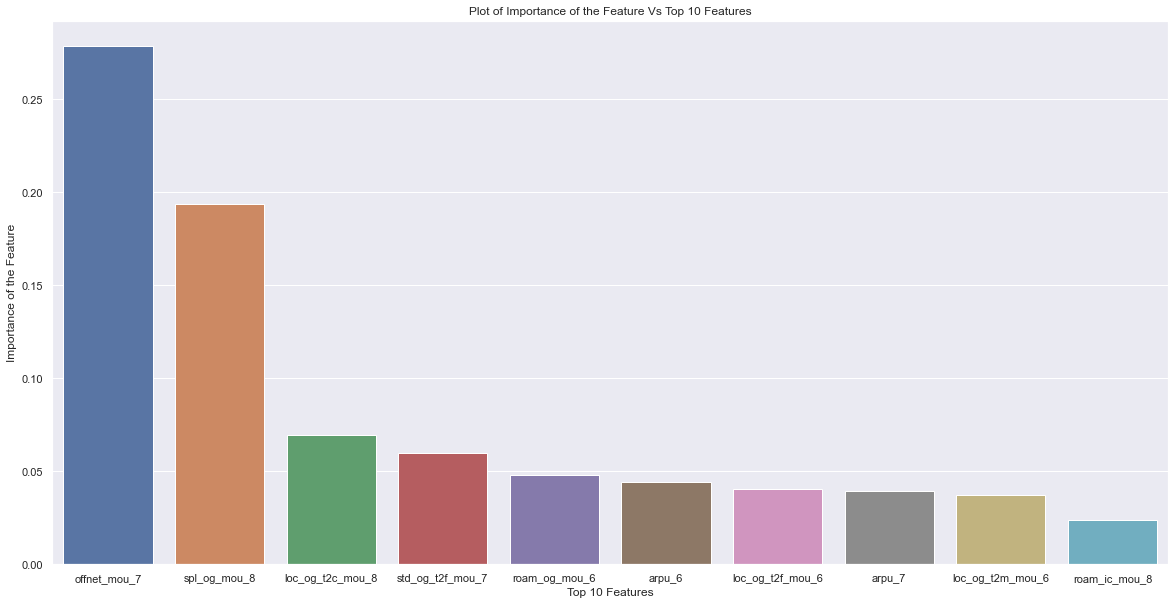

In [144]:
imp=rfc_final.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_imp=pd.DataFrame({"Variable":names,"importance":imp})
df_imp = df_imp.sort_values(by="importance",axis=0,ascending=False)
df_imp = df_imp.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax_plot_feature_importance = sns.barplot(x='Variable', y= 'importance', data=df_imp[0:10])
ax_plot_feature_importance.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
ax_plot_feature_importance.set_ylabel('Importance of the Feature')
ax_plot_feature_importance.set_xlabel('Top 10 Features')
ax_plot_feature_importance.set_title('Plot of Importance of the Feature Vs Top 10 Features')
plt.show()

Above plot is depicting the top 10 features along with their importance for predicting the Customer Churn
From the above plot it is concluded that offnet_mou_7 is the top most feature for predicting Customer Churn followed by spl_og_mou_8

#### Conclusion / Recommendation

- Entire analysis is done on high value customers and we see very few cusomers are churning out (8.6%)
- According to the above analysis Random Forest model is the best for predicting the Customer Churn, followed by Logistic Regression. So use this technique to predict the probable churn customers
- From the EDA section it is observed that most of the customer churns happen between 25th to 31st of the month. So sending out different attractive offers from 20th of the month to retain the customers
- Focus on customers making more offnet calls. There are chances that customer may churn
- Look out for customers who are making more outgoing special calls (spl_og_mou_8) in 8th month. There are chances that these customer may churn
- loc_og_t2c_mou_8 - Focus on these customers who are more ofeten calling the T operator own call center on the 8th month. They might be facing some problem and if that don't get resolved, these customer may churn
- Focus on those customers, who are making more outgoing calls or receiving incoming calls in roaming in the 8th month. These customer have more probability of churn